<h1>Régression Logistique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Log-experiment-to-Neptune.ai" data-toc-modified-id="Log-experiment-to-Neptune.ai-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Log experiment to Neptune.ai</a></span></li><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#SPLITTING" data-toc-modified-id="SPLITTING-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SPLITTING</a></span></li><li><span><a href="#Métique-métier-et-scorer" data-toc-modified-id="Métique-métier-et-scorer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Métique métier et scorer</a></span><ul class="toc-item"><li><span><a href="#Scores-de-modèles-prédisant-toujours-la-même-classe" data-toc-modified-id="Scores-de-modèles-prédisant-toujours-la-même-classe-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scores de modèles prédisant toujours la même classe</a></span><ul class="toc-item"><li><span><a href="#Classe-majoritaire" data-toc-modified-id="Classe-majoritaire-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Classe majoritaire</a></span></li><li><span><a href="#Classe-minoritaire" data-toc-modified-id="Classe-minoritaire-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Classe minoritaire</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Evaluation-du-modéle" data-toc-modified-id="Evaluation-du-modéle-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Evaluation du modéle</a></span></li><li><span><a href="#Etude-des-differentes-options-pour-rétablir-l'équilbre-entre-les-classes" data-toc-modified-id="Etude-des-differentes-options-pour-rétablir-l'équilbre-entre-les-classes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Etude des differentes options pour rétablir l'équilbre entre les classes</a></span><ul class="toc-item"><li><span><a href="#Pipeline-with-sampling--step" data-toc-modified-id="Pipeline-with-sampling--step-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Pipeline with sampling  step</a></span><ul class="toc-item"><li><span><a href="#Under-Sampling" data-toc-modified-id="Under-Sampling-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Under Sampling</a></span></li><li><span><a href="#Over-Sampling" data-toc-modified-id="Over-Sampling-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Over Sampling</a></span></li><li><span><a href="#Class-Weight-'balanced'" data-toc-modified-id="Class-Weight-'balanced'-6.2.1.3"><span class="toc-item-num">6.2.1.3&nbsp;&nbsp;</span>Class Weight 'balanced'</a></span></li></ul></li><li><span><a href="#Combinaison-des-trois-solutions-précédentes" data-toc-modified-id="Combinaison-des-trois-solutions-précédentes-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Combinaison des trois solutions précédentes</a></span></li></ul></li><li><span><a href="#Recherche-de-la-combinaison-optimale" data-toc-modified-id="Recherche-de-la-combinaison-optimale-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Recherche de la combinaison optimale</a></span></li><li><span><a href="#Meilleure-solution" data-toc-modified-id="Meilleure-solution-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Meilleure solution</a></span></li></ul></li><li><span><a href="#Récapitulatif-des-scores" data-toc-modified-id="Récapitulatif-des-scores-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Récapitulatif des scores</a></span></li><li><span><a href="#Sauvegarde-du-modèle-pour-dasboard" data-toc-modified-id="Sauvegarde-du-modèle-pour-dasboard-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sauvegarde du modèle pour dasboard</a></span></li></ul></div>

# Imports




In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
pd.set_option('display.max_row', 244)
pd.set_option('display.max_column', 243)
pd.set_option('display.max_colwidth', 50)

# graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


# misc libaries
import missingno as msno
bleu = (70 / 255, 130 / 255, 180 / 255)
# import dataprep.eda as eda
#import qgrid

# File system manangement
import os
import joblib 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 1
%aimport Functions
from Functions import plot_confusion_matrix, cv_score,evaluate_estimator, proba_distributions, feature_importance_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading functions ...


.... done.


In [4]:
# CONSTANTS

ITERATIONS = 144

JOBS = 4

EDA = 'EDA 1-7 all features_aggregated'


LOG = True

RESUME = True
ID_RUN = 'PROJ-8'

# Log experiment to Neptune.ai

In [4]:
import neptune.new as neptune
import neptune.new.integrations.optuna as optuna_utils
from neptune.new.types import File

if LOG:
    NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkOTQ1YmNhNS1hZDYyLTRlYzQtYWU0Zi0xMjY0Yjg1MzBiMzEifQ=="
    # log to Neptune
    if RESUME:
        run = neptune.init(api_token=NEPTUNE_API_TOKEN,
                           project='m.leroy975/Projet07',
                           run=ID_RUN) # your credentials
    else:
        run = neptune.init(api_token=NEPTUNE_API_TOKEN,
                           project='m.leroy975/Projet07') # your credentials
    run['sys/tags'].add(EDA)
    run['sys/tags'].add('balanced')
    
    neptune_callback = optuna_utils.NeptuneCallback(run,
                                                    plots_update_freq=10,
                                                    log_plot_param_importances=True)   

Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/m.leroy975/Projet07/e/PROJ-8
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


# Chargement des données




In [5]:
# local run
path='FEATURES/'
features = joblib.load ( path+EDA+'.feat')

# Kaggle run
# path='../input/projet-07/' 
# features = joblib.load ( path+EDA+'.feat')

if LOG:
    # Name and hash of experiment features
    run['Data/Version/Features'].log(EDA)
    run['Data/Version/Features hash'].log(pd.util.hash_pandas_object(features))

Vérification du chargement

<AxesSubplot:>

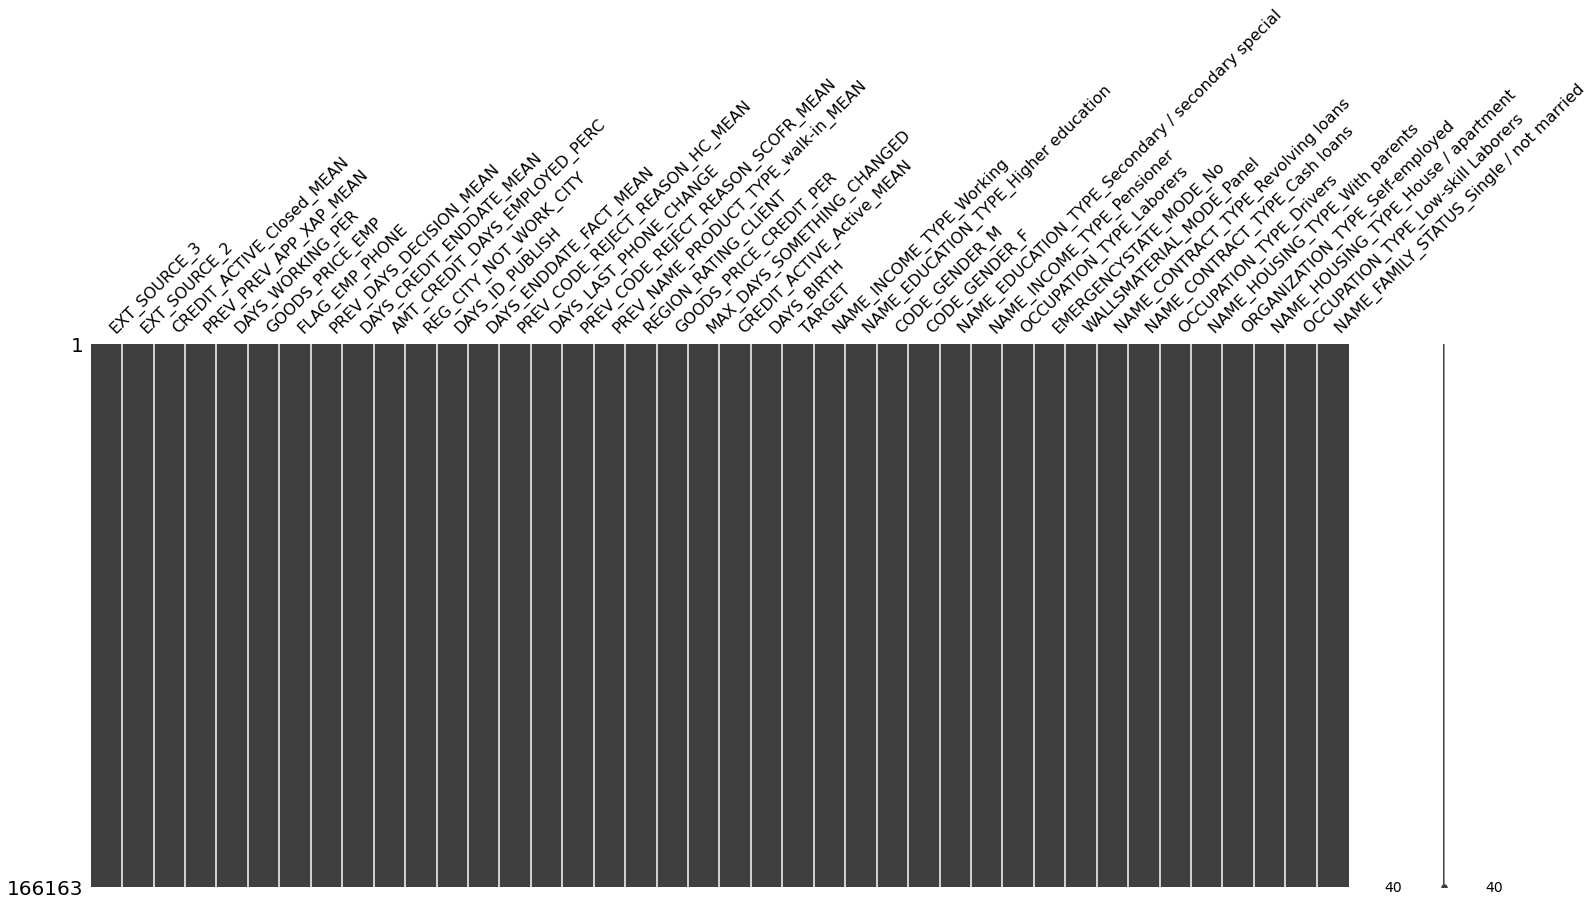

In [6]:
msno.matrix(features)

In [7]:
# Features overwiew
from collections import Counter

display(features)
print('Features shape {} x {}'.format(features.shape[0],features.shape[1]))
# TARGET ration on whole dataset
print('TARGET ratio {:.8%}'.format(features.TARGET.value_counts()[1]/features.TARGET.value_counts()[0]) )
print(Counter(features.TARGET))

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_PREV_APP_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.262949,0.750000,1.00,0.067329,0.001815,1,-606.000000,-349.000000,-0.001567,0,-2120,-697.500000,0.00,-1134.0,0.0,0.00,2,1.158397,-637.0,0.250000,-9461,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1
100004,0.729567,0.555912,1.000000,1.00,0.011814,0.001667,1,-815.000000,-488.500000,-0.001667,0,-2531,-532.500000,0.00,-815.0,0.0,0.00,2,1.000000,-225.0,0.000000,-19046,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1
100008,0.621226,0.354225,0.666667,1.00,0.093737,0.003494,1,-1192.000000,-391.333333,-0.003238,0,-477,-909.000000,0.00,-2536.0,0.0,0.00,2,1.079198,-477.0,0.333333,-16941,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
100009,0.492060,0.724000,0.777778,1.00,0.227174,0.002244,1,-719.285714,-794.937500,-0.002005,0,-619,-1108.500000,0.00,-1562.0,0.0,0.00,2,1.118800,-619.0,0.222222,-13778,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
100010,0.540654,0.714279,0.500000,1.00,0.023820,0.000293,1,-1070.000000,-119.500000,-0.000293,1,-2379,-1138.000000,0.00,-1070.0,0.0,0.00,3,1.000000,-449.0,0.500000,-18850,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456246,0.735221,0.313334,0.666667,1.00,0.543859,0.038827,1,-897.000000,-234.666667,-0.038827,1,-4531,-1331.000000,0.00,-1516.0,0.0,0.00,2,1.000000,-4531.0,0.333333,-16063,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0
456247,0.609276,0.501221,0.727273,0.80,0.033614,0.001612,1,-1387.800000,1449.818182,-0.001155,0,-3936,-1085.000000,0.20,-2315.0,0.0,0.00,2,1.396000,-399.0,0.272727,-11870,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
456253,0.218859,0.535722,0.500000,1.00,0.529266,0.013540,1,-2380.000000,280.500000,-0.011689,1,-5150,-794.000000,0.00,-1909.0,0.0,0.00,3,1.158400,-5150.0,0.500000,-14966,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0


Features shape 166163 x 40
TARGET ratio 8.55218459%
Counter({0: 153072, 1: 13091})


In [8]:
# Descriptive Statistics of features
features.describe()

,EXT_SOURCE_3,EXT_SOURCE_2,CREDIT_ACTIVE_Closed_MEAN,PREV_PREV_APP_XAP_MEAN,DAYS_WORKING_PER,GOODS_PRICE_EMP,FLAG_EMP_PHONE,PREV_DAYS_DECISION_MEAN,DAYS_CREDIT_ENDDATE_MEAN,AMT_CREDIT_DAYS_EMPLOYED_PERC,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_ENDDATE_FACT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,DAYS_LAST_PHONE_CHANGE,PREV_CODE_REJECT_REASON_SCOFR_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,REGION_RATING_CLIENT,GOODS_PRICE_CREDIT_PER,MAX_DAYS_SOMETHING_CHANGED,CREDIT_ACTIVE_Active_MEAN,DAYS_BIRTH,TARGET,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,OCCUPATION_TYPE_Laborers,EMERGENCYSTATE_MODE_No,WALLSMATERIAL_MODE_Panel,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,NAME_HOUSING_TYPE_House / apartment,OCCUPATION_TYPE_Low-skill Laborers,NAME_FAMILY_STATUS_Single / not married
count,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.00000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000,166163.000000
mean,0.510259,0.522641,0.653382,0.862464,0.167314,0.007263,0.999958,-960.526239,530.347564,-0.006515,0.269284,-2930.141831,-948.384656,0.061699,-1068.938759,0.005888,0.081658,2.055151,1.121981,-1432.243454,0.342889,-15032.930021,0.078784,0.634377,0.268225,0.363884,0.636116,0.687837,0.000048,0.217287,0.525767,0.21784,0.093137,0.906863,0.072525,0.052081,0.142926,0.883241,0.006927,0.136553
std,0.194887,0.186316,0.224895,0.197720,0.138020,0.011067,0.006490,568.589438,2591.832795,0.009935,0.443589,1485.695073,512.261883,0.133157,825.088565,0.043194,0.177448,0.499676,0.124815,1181.057628,0.223962,3555.417425,0.269402,0.481606,0.443036,0.481117,0.481117,0.463377,0.006939,0.412401,0.499337,0.41278,0.290626,0.290626,0.259356,0.222192,0.349998,0.321134,0.082940,0.343376
min,0.000527,0.000010,0.000000,0.000000,0.000042,0.000002,0.000000,-2922.000000,-28039.000000,-0.256178,0.000000,-7197.000000,-2884.000000,0.000000,-4173.000000,0.000000,0.000000,1.000000,0.150000,-6226.000000,0.000000,-25200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,0.411550,0.500000,0.750000,0.061776,0.001720,1.000000,-1297.000000,-711.000000,-0.007465,0.000000,-4239.000000,-1269.500000,0.000000,-1684.000000,0.000000,0.000000,2.000000,1.000000,-2094.000000,0.187500,-17721.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.537070,0.573477,0.666667,1.000000,0.130265,0.003899,1.000000,-845.375000,-197.000000,-0.003506,0.000000,-3076.000000,-916.000000,0.000000,-929.000000,0.000000,0.000000,2.000000,1.118800,-1094.000000,0.333333,-14834.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.667458,0.666053,0.800000,1.000000,0.234367,0.008310,1.000000,-512.422619,505.950000,-0.001541,1.000000,-1696.000000,-565.633333,0.000000,-376.000000,0.000000,0.083333,2.000000,1.198000,-495.000000,0.500000,-12168.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.885488,0.855000,1.000000,1.000000,0.728811,0.256178,1.000000,-2.000000,31186.000000,-0.

# SPLITTING

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features,
                               test_size=.2,
                               random_state=42,
                               shuffle=True,
                               stratify=features.TARGET)

train_true = train.pop('TARGET')
print('train',train.shape)
print('TARGET=1 ratio on train {:.8%}'.format(train_true.value_counts()[1]/train_true.value_counts()[0]) )
test_true = test.pop('TARGET')
print('test',test.shape)
print('TARGET=1 ratio on test {:.8%}'.format(test_true.value_counts()[1]/test_true.value_counts()[0]))

train (132930, 39)
TARGET=1 ratio on train 8.55238982%
test (33233, 39)
TARGET=1 ratio on test 8.55136371%


In [10]:
if LOG:
    run['Data/Version/Train shape'].log(str(train.shape))
    run['Data/Version/Train target ratio'].log(train_true.value_counts()[1]/train_true.value_counts()[0])
    run['Data/Version/Test shape'].log(str(test.shape))
    run['Data/Version/Test target ratio'].log(test_true.value_counts()[1]/test_true.value_counts()[0])

# Métique métier et scorer

In [5]:
from sklearn.metrics import  confusion_matrix, make_scorer, roc_auc_score

# Cost weight penalties
tn_cost = 2  ; fp_cost = -5
fn_cost = -6  ; tp_cost = 1

penalty = np.array([tn_cost,fp_cost,fn_cost,tp_cost])

In [15]:
# The confusion matrix is normalized on true classes
# and penalties are applied
# Cette normalisation permet au score d'être insensible au rééchantillonnage
def raw_cost(y,y_pred):
    cm = confusion_matrix(y,y_pred,normalize='true')
    print(cm*100)
    return  sum( cm.reshape(-1)*penalty)

In [16]:
# Worst score
true =  [0,0,1,1]
preds = [1,1,0,0] 
print('Worst cost score : ',raw_cost(true, preds))

# Best score
true =  [0,0,0,1,1,1,1,0,0,0,1,0,1]
preds = [0,0,0,1,1,1,1,0,0,0,1,0,1] 
print('Best cost score : ',raw_cost(true, preds))


[[  0. 100.]
 [100.   0.]]
Worst cost score :  -11.0
[[100.   0.]
 [  0. 100.]]
Best cost score :  3.0


In [19]:
# Normalized cost function
def cost(y,y_pred):
    cm = confusion_matrix(y,y_pred,normalize='true')
    return  (sum( cm.reshape(-1)*penalty)+11)/14

SCORER = {'AUC' : 'roc_auc', 'COST' : make_scorer(cost)}

Worst cost score :  0.0


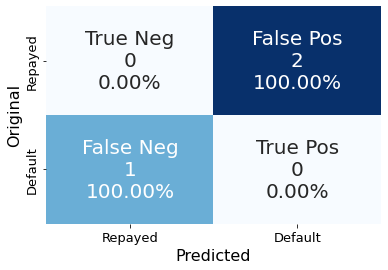

In [23]:
# Worst score
true =  [0,0,1]
preds = [1,1,0] 
print('Worst cost score : ',cost(true, preds))
# print('Worst roc auc score : ',roc_auc_score(true, preds))
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(true, preds, ax)

Best cost score :  1.0


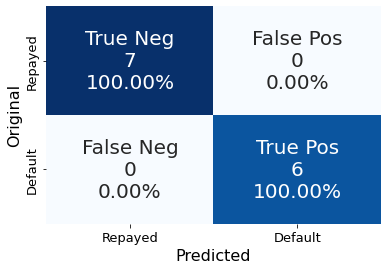

In [13]:
# Best score
true =  [0,0,0,1,1,1,1,0,0,0,1,0,1]
preds = [0,0,0,1,1,1,1,0,0,0,1,0,1] 
print('Best cost score : ',cost(true, preds))
# print('Best roc auc score : ',roc_auc_score(true, preds))
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(true, preds, ax)

## Scores de modèles prédisant toujours la même classe

###  Classe majoritaire

Score : 0.5


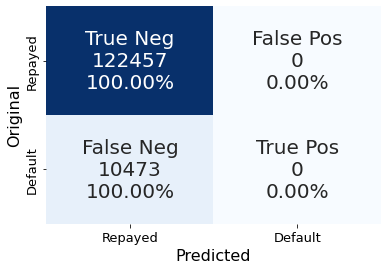

In [14]:
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(train_true, [0]*len(train_true), ax)
print('Score :',cost(train_true, [0]*len(train_true)))

In [15]:
roc_auc_score(train_true, [0]*len(train_true))

0.5

###  Classe minoritaire

Score : 0.5


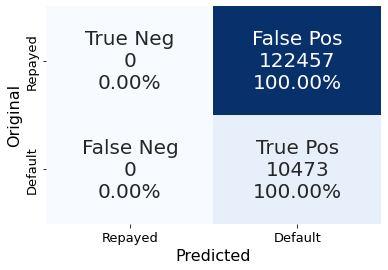

In [16]:
fig, ax = plt.subplots(1,1)
plot_confusion_matrix(train_true, [1]*len(train_true), ax)
print('Score :',cost(train_true, [1]*len(train_true)))

In [17]:
roc_auc_score(train_true, [0]*len(train_true))

0.5

Tout modèle doit au moins avoir un score de plus de 50%

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

MODEL = LogisticRegression(random_state=42, n_jobs=-1)
if LOG:
    # Name and hash of experiment features
    run['Modele/Name'] = 'Logistic Regression'
    run['sys/description'] = 'Logistic Regression'
    

## Evaluation du modéle 

Pipeline : 

    * min max scaler [0;1]
    * modèle
    
Scores sur 5 cross validations    

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Class balance on fitting model step : Counter({0: 122457, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    122457
           1       0.55      0.01      0.02     10473

    accuracy                           0.92    132930
   macro avg       0.74      0.50      0.49    132930
weighted avg       0.89      0.92      0.88    132930

 Scores  on train : {'COST': 0.5042920200107647, 'AUC': 0.742952966098669}
TEST
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     30615
           1       0.52      0.01      0.02      2618

    accuracy                           0.92     33233
   macro avg       0.72      0.50      0.49     33233
weighted avg       0.89      0.92      0.88     33233

 Scores  on test : {'COST': 0.5042243506462315}


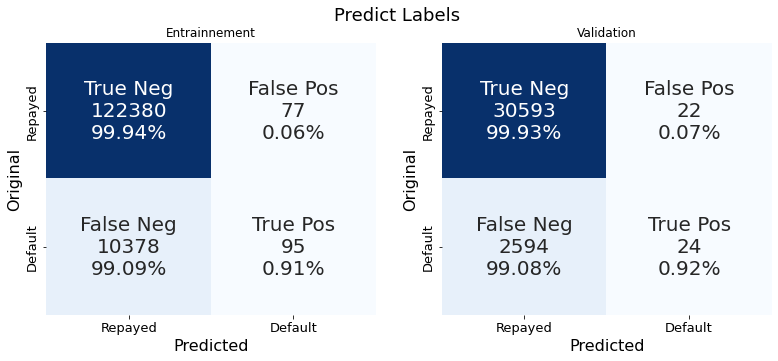

In [20]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import Pipeline 

from collections import Counter


pipe = Pipeline([ 
                 ('scaler' , MinMaxScaler(feature_range=(0, 1))),
                          
                 ('model', MODEL)
               ])

# fit pipeline on train
pipe.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(train_true))
if LOG:
    run['Modele/[Out of bag]/Classe efectives'] = str(Counter(train_true))

# print evaluation summary
evaluate_estimator(pipe,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Out of bag]/')
                  )

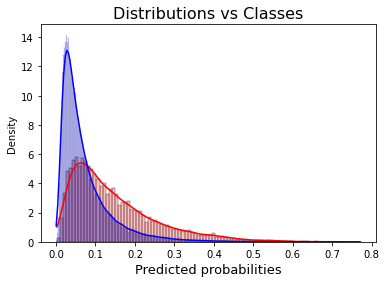

In [21]:
# Distribution of prediction probabilities versus classes
train_predicted_probas = pipe.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Out of bag]/Train')
                   )

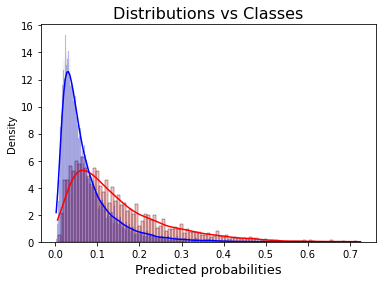

In [22]:
# Distribution of prediction probabilities versus classes
test_predicted_probas = pipe.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Out of bag]/Test')
                   )

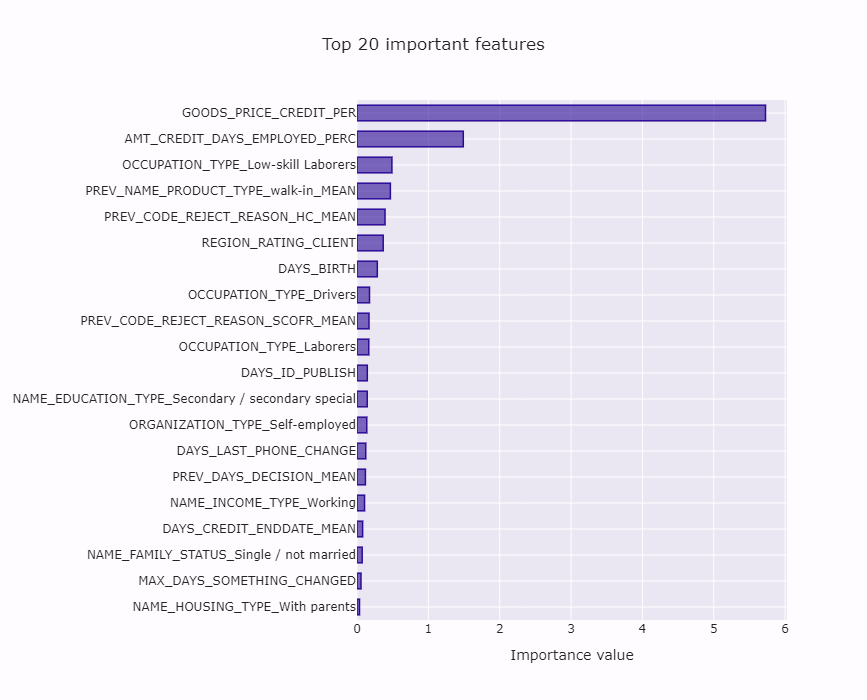

In [23]:
# Feature importance for model
feature_importance_plot(pipe[-1].coef_[0],train,
                        (LOG,run,'Modele/[Out of bag]/')
                       )

## Etude des differentes options pour rétablir l'équilbre entre les classes

### Pipeline with sampling  step

In [24]:
pipe_samplers = Pipeline([ 
                          ('over' , None),
                          ('under' , None),
                          ('scaler' , MinMaxScaler(feature_range=(0, 1))),
                          
                          ('model', MODEL)
                     ]
                    )

#### Under Sampling

Pipeline(steps=[('over', None), ('under', RandomUnderSampler(random_state=42)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

Class balance on fitting model step : Counter({0: 10473, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122457
           1       0.16      0.68      0.25     10473

    accuracy                           0.69    132930
   macro avg       0.56      0.68      0.53    132930
weighted avg       0.90      0.69      0.76    132930

 Scores  on train : {'COST': 0.6804058706279237, 'AUC': 0.7429823708436378}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30615
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33233
   macro avg       0.56      0.68      0.53     33233
weighted avg       0.90      0.69      0.76     33233

 Scores  on test : {'COST': 0.6769547238074777}


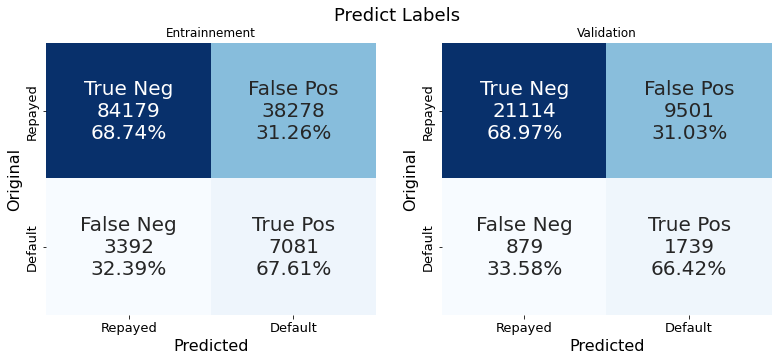

In [25]:
from sklearn.base import clone
from imblearn.under_sampling import RandomUnderSampler 

pipe_under = clone(pipe_samplers)

# set pipeline set 'sampler' to RandomUnderSampler
pipe_under.set_params(**{'under': RandomUnderSampler (random_state=42) })
display(pipe_under)

# fit pipeline on train
pipe_under.fit(train, train_true)


# Count effective classes
sampled_train_true = pipe_under[0:2].fit_resample(train,train_true)[1]
print('Class balance on fitting model step : %s' % Counter(sampled_train_true))
if LOG:
    run['Modele/[Under]/Classe efectives'] = str(Counter(sampled_train_true))


evaluate_estimator(pipe_under,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Under]/')
                  )

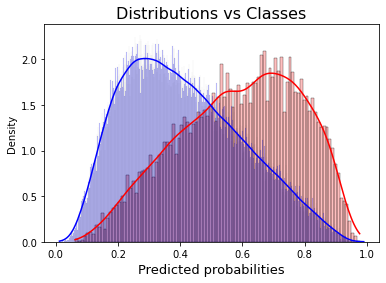

In [26]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_under.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Under]/Train')
                   )

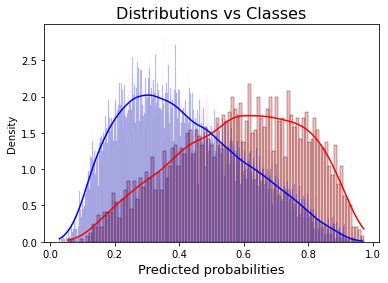

In [27]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_under.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Under]/Test')
                   )

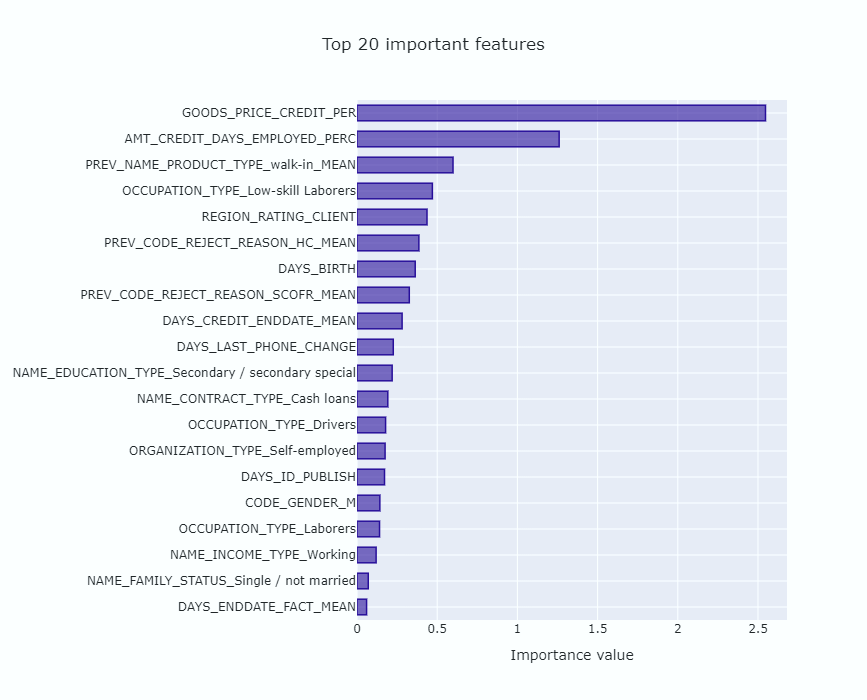

In [28]:
# Feautres importance for model
feature_importance_plot(pipe_under[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Under]/')
                       )

#### Over Sampling

Pipeline(steps=[('over', RandomOverSampler(random_state=42)), ('under', None),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(n_jobs=-1, random_state=42))])

Class balance on fitting model step : Counter({0: 122457, 1: 122457})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122457
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132930
   macro avg       0.56      0.68      0.53    132930
weighted avg       0.90      0.69      0.76    132930

 Scores  on train : {'COST': 0.6807661465189779, 'AUC': 0.7432688195018666}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30615
           1       0.16      0.66      0.25      2618

    accuracy                           0.69     33233
   macro avg       0.56      0.68      0.53     33233
weighted avg       0.90      0.69      0.76     33233

 Scores  on test : {'COST': 0.6773880047765398}


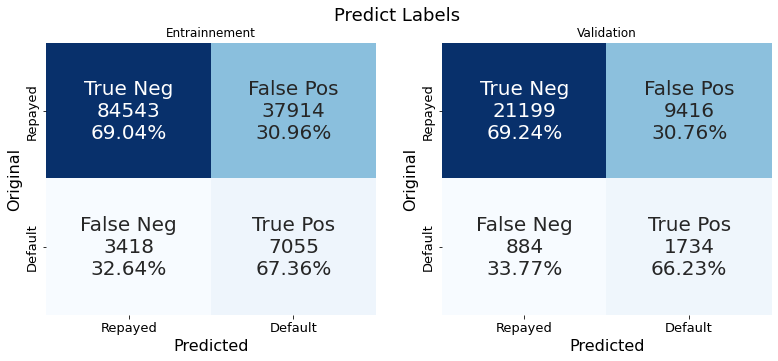

In [29]:
from imblearn.over_sampling import RandomOverSampler 

pipe_over = clone(pipe_samplers)

# set pipeline set 'sampler' to RandomOverSampler
pipe_over.set_params(**{'over': RandomOverSampler (random_state=42) })
display(pipe_over)

# fit pipeline on train
pipe_over.fit(train, train_true)

# Count effective classes
sampled_train_true = [0,1]*train_true.value_counts()[0] #pipe_over[0:2].fit_resample(train,train_true)[1]
print('Class balance on fitting model step : %s' % Counter(sampled_train_true))
if LOG:
    run['Modele/[Over]/Classe efectives'] = str(Counter(sampled_train_true))

# evaluate
evaluate_estimator(pipe_over,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Over]/')
                  )

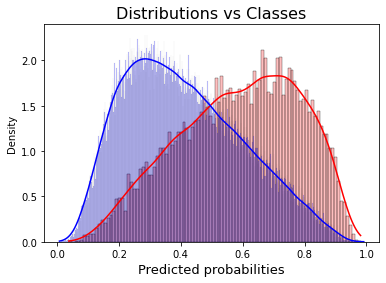

In [30]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_over.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Over]/Train')
                   )

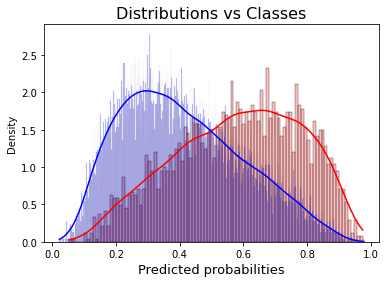

In [31]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_over.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Over]/Test')
                   )

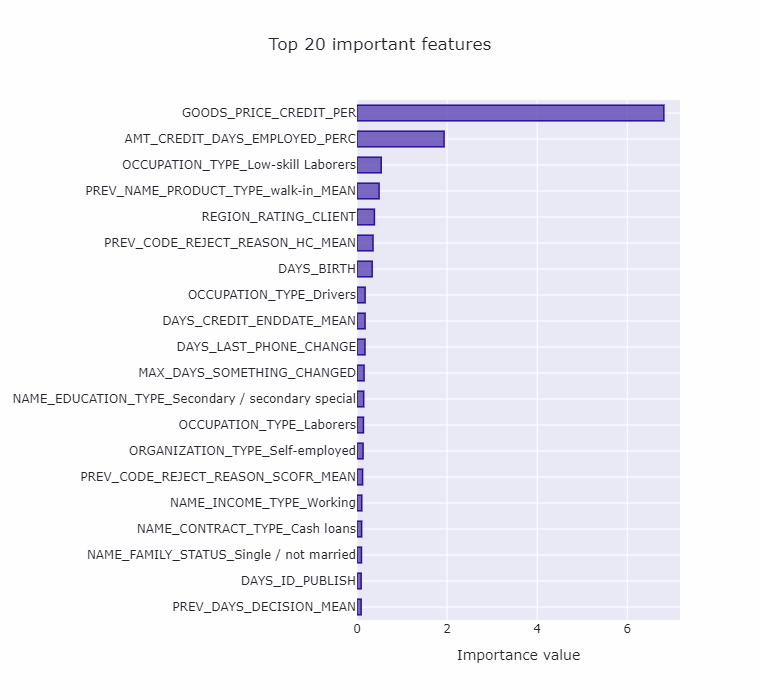

In [32]:
# Feautres importance for model
feature_importance_plot(pipe_over[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Over]/')
                       )

#### Class Weight 'balanced'

Pipeline(steps=[('over', None), ('under', None), ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=42))])

Class balance on fitting model step : Counter({0: 122457, 1: 10473})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122457
           1       0.16      0.67      0.25     10473

    accuracy                           0.69    132930
   macro avg       0.56      0.68      0.53    132930
weighted avg       0.90      0.69      0.76    132930

 Scores  on train : {'COST': 0.6816917725629914, 'AUC': 0.7432291057026397}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30615
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33233
   macro avg       0.56      0.68      0.53     33233
weighted avg       0.90      0.69      0.76     33233

 Scores  on test : {'COST': 0.6760787732312649}


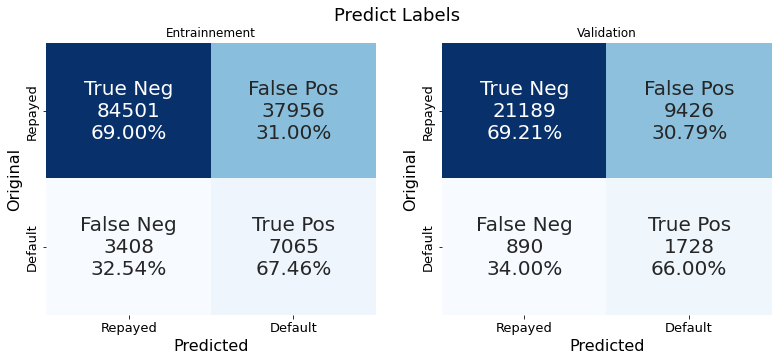

In [33]:

pipe_balance = clone(pipe_samplers)

# fit pipeline on train with sample_weight
pipe_balance.set_params(**{'model__class_weight': 'balanced'})
display(pipe_balance)

# fit pipeline on train
pipe_balance.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(train_true))
if LOG:
    run['Modele/[Balance]/Classe efectives'] = str(Counter(train_true))

# evaluate
evaluate_estimator(pipe_balance,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Balance]/')
                  )


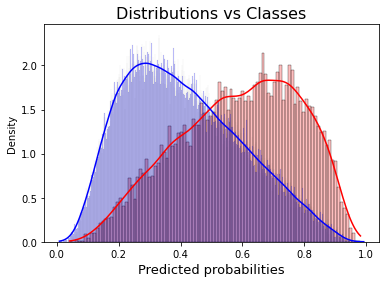

In [34]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_balance.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Balance]/Train')
                   )

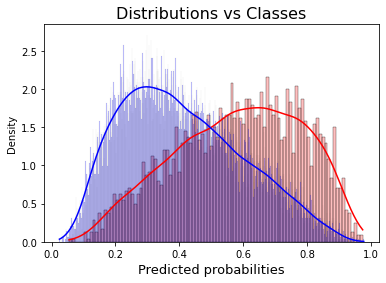

In [35]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_balance.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Balance]/Test')
                   )

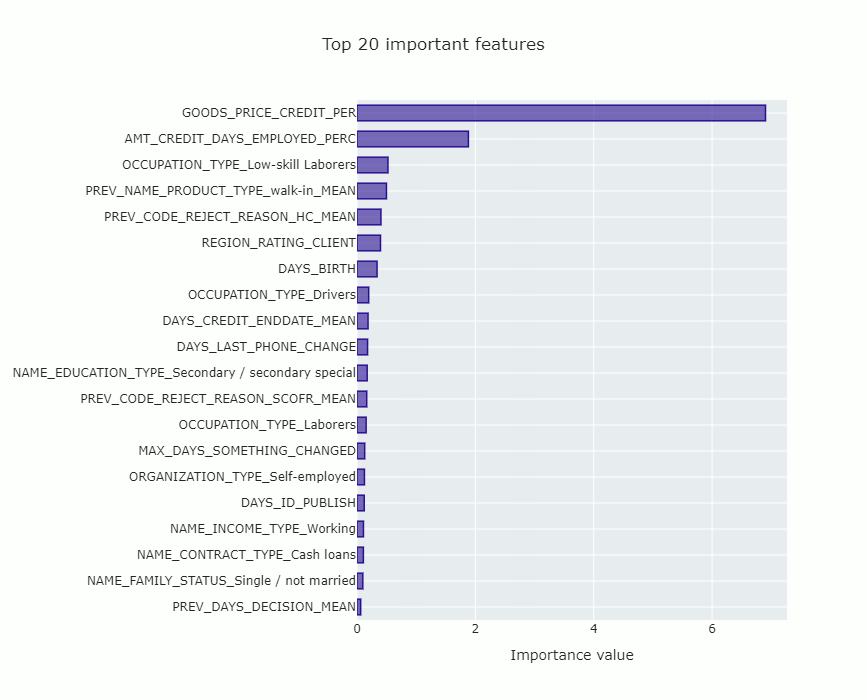

In [36]:
# Feautres importance for model
feature_importance_plot(pipe_balance[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Balance]/')
                       )

### Combinaison des trois solutions précédentes

Pour rééquilibrer les classes:

    * undersampler classe majoritaire en ne prenant que 75% des samples de cette classe
    
    * oversampler classe ninoritaire en duplicant 25% des samples de cette classe
    
    * pondérer les individus en fonction de leur appartenance à majority ou miority (option 'balanced' du modèle)





Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.10690487273083613)),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy=0.1425398303077815)),
                ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=42))])

Class balance on fitting model step : Counter({0: 91840, 1: 13091})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122457
           1       0.16      0.68      0.25     10473

    accuracy                           0.69    132930
   macro avg       0.56      0.68      0.53    132930
weighted avg       0.90      0.69      0.76    132930

 Scores  on train : {'COST': 0.681897679473481, 'AUC': 0.7432718901069706}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30615
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33233
   macro avg       0.56      0.68      0.53     33233
weighted avg       0.90      0.69      0.76     33233

 Scores  on test : {'COST': 0.6760197838878993}


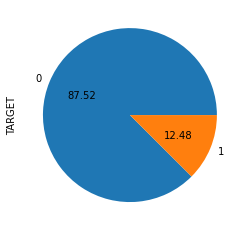

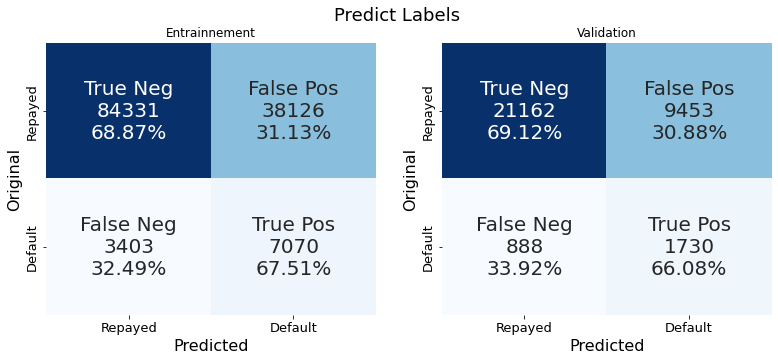

In [37]:
# Initial ratio between classes
ratio_initial = train_true.value_counts()[1]/train_true.value_counts()[0]

# Sampling factors
over = .25
under = .75
# Compute strategy for samplers
over_strategy = ratio_initial *(1 + over)
under_strategy = ratio_initial *(1 + over)/( under)

# set pipeline over and under 
pipe_samplers.set_params(**{'over': RandomOverSampler (random_state=42,sampling_strategy=over_strategy),
                        'under': RandomUnderSampler (random_state=42,sampling_strategy=under_strategy),
                        'model__class_weight': 'balanced'})
display(pipe_samplers)

# fit pipeline on train
pipe_samplers.fit(train, train_true)

# Count effective classes
sampled_train_true = pipe_samplers[0:2].fit_resample(train,train_true)[1]

print('Class balance on fitting model step : %s' % Counter(sampled_train_true))

sampled_train_true.value_counts().plot.pie(autopct='%.2f')
if LOG:
    run['Modele/[Samplers & Weight]/Classe efectives'] = str(Counter(sampled_train_true))


# evaluate
evaluate_estimator(pipe_samplers,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Samplers & Weight]/')
                  )

Le modèle généralise bien, les écarts sont minces entre entrainement et validation.

Grid search pour déterminer les meilleurs paramètres du pipeline

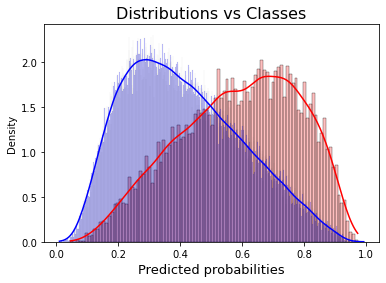

In [38]:
# Distribution of prediction probabilities versus classes on train
train_predicted_probas = pipe_samplers.predict_proba(train)
proba_distributions(train_true,
                    train_predicted_probas,
                    (LOG,run,'Modele/[Samplers & Weight]/Train')
                   )

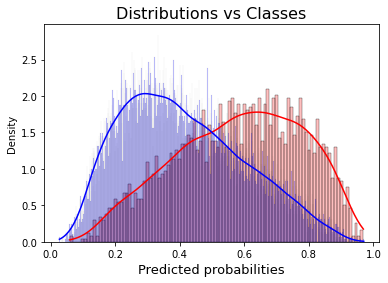

In [39]:
# Distribution of prediction probabilities versus classes on test
test_predicted_probas = pipe_samplers.predict_proba(test)
proba_distributions(test_true,
                    test_predicted_probas,
                    (LOG,run,'Modele/[Samplers & Weight]/Test')
                   )

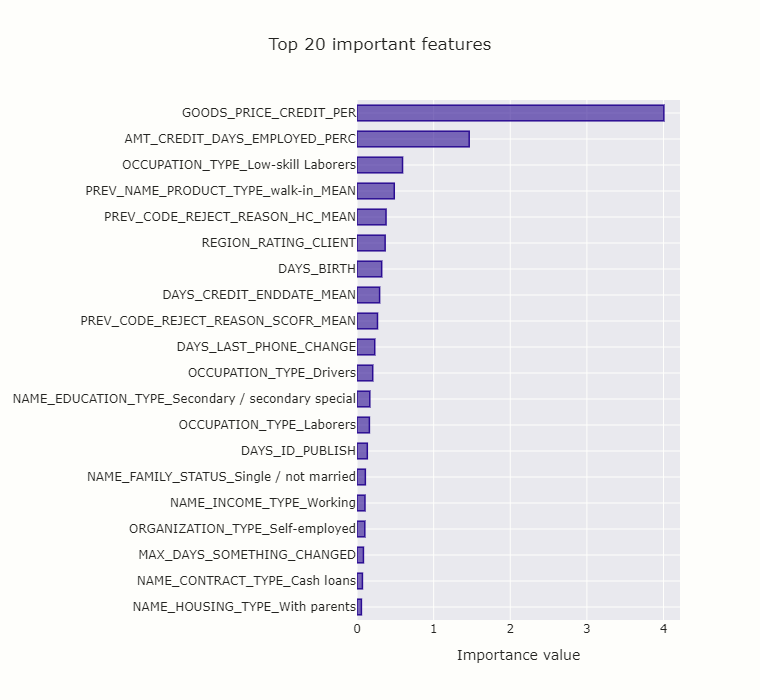

In [40]:
# Feautres importance for model
feature_importance_plot(pipe_samplers[-1].coef_[0],
                        train,
                        (LOG,run,'Modele/[Samplers & Weight]/')
                       )

## Recherche de la combinaison optimale

In [41]:
from sklearn.preprocessing import StandardScaler  # MODIFIE
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from joblib import Memory
from shutil import rmtree
# Create a temporary folder to store the transformers of the pipeline
# location = 'cachedir0'
# memory = Memory(location=location, verbose=0)


# Reset pipeline parameters
pipe_optim = Pipeline([ #('variance' , VarianceThreshold(threshold=0.0)),
                            ('over' , RandomOverSampler (random_state=42)),
                            ('under' , RandomUnderSampler(random_state=42)),
                            ('scaler' , None),

                            ('model', LogisticRegression(random_state=42,max_iter=5000,n_jobs=-1))
                        ],
#                         memory=memory
                       )

In [42]:
pipe_optim.get_params()

{'memory': None,
 'steps': [('over', RandomOverSampler(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('scaler', None),
  ('model', LogisticRegression(max_iter=5000, n_jobs=-1, random_state=42))],
 'verbose': False,
 'over': RandomOverSampler(random_state=42),
 'under': RandomUnderSampler(random_state=42),
 'scaler': None,
 'model': LogisticRegression(max_iter=5000, n_jobs=-1, random_state=42),
 'over__random_state': 42,
 'over__sampling_strategy': 'auto',
 'over__shrinkage': None,
 'under__random_state': 42,
 'under__replacement': False,
 'under__sampling_strategy': 'auto',
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 5000,
 'model__multi_class': 'auto',
 'model__n_jobs': -1,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [43]:
### fonction to maximize
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.base import clone

ratio_initial = train_true.value_counts()[1]/train_true.value_counts()[0]
std = StandardScaler()
mmx = MinMaxScaler(feature_range=(0, 1))
qt = QuantileTransformer(n_quantiles=10000,
                        output_distribution='normal',
                        ignore_implicit_zeros=False,
                        subsample=100000,
                        random_state=42)
rob = RobustScaler(with_centering=True,
                        with_scaling=True,
                        quantile_range=(25.0, 75.0),
                        copy=True,
                        unit_variance=True)
pwt = PowerTransformer(method='yeo-johnson',
                     standardize=True,
                     copy=True)

def Opt_search(trial):
    # the function gets a set of variable parameters in "param"
    # we use theses params to set pipeline params
    
    # Initialize params
    params = {}
    pipe = clone(pipe_optim)
    
    # Variance space
#     params['variance__threshold'] = trial.suggest_float('variance', 0, .1)  # MODIFIE
    
    # ratios for samplers
    o_r = trial.suggest_float('ratio_over', 0, 1)
    u_r = trial.suggest_float('ratio_under', .5, 1)
    
    #over sampling
    params['over__sampling_strategy'] =  ratio_initial *(1 + o_r)
    
    # under sampling
    params['under__sampling_strategy'] = ratio_initial *(1 + o_r)/( u_r) 
    
    # sample weight
#     x = trial.suggest_float('weight',0.5,0.99)  # MODIFIE
#     params['model__class_weight'] = {0 : 1-x, 1 : x}
    params['model__class_weight'] = 'balanced'
        
    # Scaller space
    scaler_name = trial.suggest_categorical('scaller name', ['StandardScaler',
                                                             'MinMaxScaler',
                                                             'QuantileTransformer',
                                                             'RobustScaler',
                                                             'PowerTransformer'
                                                            ])
    if scaler_name == 'MinMaxScaler':
        params['scaler'] = mmx
                                             
    elif scaler_name == 'StandardScaler':
        params['scaler'] =  std   
        
    elif scaler_name == 'QuantileTransformer':
        params['scaler'] =  qt
        
    elif scaler_name == 'RobustScaler':
        params['scaler'] =  rob
        
    elif scaler_name == 'PowerTransformer':
        params['scaler'] =  pwt
        
    # Linear regression space       
    params['model__C'] = trial.suggest_float('model__C',1E-3,1E3)
    params['model__tol'] = trial.suggest_loguniform('model__tol',1E-6,1E-2)
    params['model__solver'] = trial.suggest_categorical('model__solver',['newton-cg','lbfgs','sag']) #removed since since too much convergence Warning did not converge

           
#     print(params)
    
    # we use theses params to set pipeline params
    pipe.set_params(**params)
    
    #     print(pipe.get_params(deep=False))
               
    # score
    score = cross_validate(pipe,
                           train,
                           train_true,
                           scoring=SCORER,
                           n_jobs=1,
                           cv=cv)
    
    print('> cv cost score mean: %.4f (\u00B1 %.4f) <> roc auc score mean: %.4f (\u00B1 %.4f) < ' % (
                                                                                        score['test_COST'].mean(),
                                                                                        score['test_COST'].std(),
                                                                                        score['test_AUC'].mean(),
                                                                                        score['test_AUC'].std()
                                                                                       )
         )
    
    if LOG:
        run['AUC'].log(score['test_AUC'].mean())
        run['COST'].log(score['test_COST'].mean())
        
    return score['test_COST'].mean()

In [44]:
# Verify pipeline before optimize
pipe_optim.get_params(deep=False)

{'memory': None,
 'steps': [('over', RandomOverSampler(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('scaler', None),
  ('model', LogisticRegression(max_iter=5000, n_jobs=-1, random_state=42))],
 'verbose': False}

In [45]:
# Create study the first time or append existing
import os.path
from os import path
import optuna
from optuna.samplers import TPESampler


# Studiing n_iter times
n_iter = ITERATIONS

# Optimize
if LOG and RESUME:
    # Load Optuna Study from the Neptune Run
    study = optuna_utils.load_study_from_run(run)  
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS, callbacks=[neptune_callback])
elif LOG and not RESUME:
    name = 'LR '+EDA
    study = optuna.create_study(study_name=name,
                                    direction='maximize',

                                    sampler=TPESampler(n_startup_trials= 50)
                                   )
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS, callbacks=[neptune_callback])
    
else:
    # Local run
    save_path = 'Studies/'
    name =save_path+'NEWRUN_lr_'+EDA+'reg_COST1'
    file_name = name+'.study'

    if path.exists(file_name):
        # load study
        study = joblib.load(file_name)
        print('Loading {}'.format(file_name))

        # Load Optuna Study from the Neptune Run
    #     study = optuna_utils.load_study_from_run(run)

    else:
        # Otherwise create study
        print('Creating a new study named {}'.format(name))
        study = optuna.create_study(study_name=name,
                                    direction='maximize',

                                    sampler=TPESampler(n_startup_trials= 10)
                                   )
        
    study.optimize(Opt_search, n_trials=n_iter, n_jobs=JOBS)

# # save the sutdy 
# joblib.dump(study, file_name)

# print best results
print('Best custom_score = {} for :\n'.format(study.best_value))

for key, value in study.best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-07-13 13:30:46,209] Trial 149 finished with value: 0.6819561519797723 and parameters: {'ratio_over': 0.4632662237305817, 'ratio_under': 0.787472172155378, 'scaller name': 'RobustScaler', 'model__C': 484.7550726736742, 'model__tol': 0.004692207797789836, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:30:49,413] Trial 146 finished with value: 0.6821619068763254 and parameters: {'ratio_over': 0.4720138766024047, 'ratio_under': 0.7667273435599378, 'scaller name': 'RobustScaler', 'model__C': 481.54086682488304, 'model__tol': 0.004185602419236383, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6822 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:31:12,243] Trial 148 finished with value: 0.6819561519797723 and parameters: {'ratio_over': 0.46315959563543807, 'ratio_under': 0.787242305434272, 'scaller name': 'RobustScaler', 'model__C': 484.8272264387942, 'model__tol': 0.0042535852575085135, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:32:30,433] Trial 147 finished with value: 0.6817639123752892 and parameters: {'ratio_over': 0.45744418849101565, 'ratio_under': 0.7875074786618844, 'scaller name': 'RobustScaler', 'model__C': 490.3218468994483, 'model__tol': 0.004510542567111754, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6818 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:34:42,223] Trial 151 finished with value: 0.6820720554980221 and parameters: {'ratio_over': 0.4676590084659421, 'ratio_under': 0.7589942008082614, 'scaller name': 'RobustScaler', 'model__C': 620.9761170096137, 'model__tol': 0.0042200877920944135, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6821 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:34:56,092] Trial 150 finished with value: 0.6821239390455996 and parameters: {'ratio_over': 0.4691746200656914, 'ratio_under': 0.7649947461873733, 'scaller name': 'RobustScaler', 'model__C': 618.810567850919, 'model__tol': 0.004332669210062885, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6821 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:35:09,903] Trial 152 finished with value: 0.6821414900464384 and parameters: {'ratio_over': 0.47175352569612605, 'ratio_under': 0.7670030393344625, 'scaller name': 'RobustScaler', 'model__C': 547.08700968313, 'model__tol': 0.00018075727772071362, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6821 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:36:23,141] Trial 153 finished with value: 0.6820023730877706 and parameters: {'ratio_over': 0.47726367577903284, 'ratio_under': 0.7661486166130604, 'scaller name': 'RobustScaler', 'model__C': 623.3222939147093, 'model__tol': 0.0005062009109204423, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:37:23,279] Trial 154 finished with value: 0.6818509411805319 and parameters: {'ratio_over': 0.47790367809599243, 'ratio_under': 0.7661207997640901, 'scaller name': 'RobustScaler', 'model__C': 537.8809455427687, 'model__tol': 0.007736860238581746, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:38:12,822] Trial 156 finished with value: 0.6819395062034999 and parameters: {'ratio_over': 0.4375336032159992, 'ratio_under': 0.7666281034065144, 'scaller name': 'RobustScaler', 'model__C': 588.0355669212919, 'model__tol': 0.0004545896712250743, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:38:34,434] Trial 155 finished with value: 0.6818525198206802 and parameters: {'ratio_over': 0.4384478332113484, 'ratio_under': 0.7706828928734183, 'scaller name': 'RobustScaler', 'model__C': 547.695860906717, 'model__tol': 0.0004259549896610275, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:39:37,141] Trial 157 finished with value: 0.6815581834412656 and parameters: {'ratio_over': 0.3954854032617188, 'ratio_under': 0.7487313662651879, 'scaller name': 'RobustScaler', 'model__C': 585.761545484866, 'model__tol': 1.6151401921998123e-05, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6816 (± 0.0044) <> roc auc score mean: 0.7432 (± 0.0048) < 


[I 2021-07-13 13:40:33,140] Trial 158 finished with value: 0.6817937794916894 and parameters: {'ratio_over': 0.44063489414227974, 'ratio_under': 0.8138857494342387, 'scaller name': 'RobustScaler', 'model__C': 591.0100388455534, 'model__tol': 5.7768391513714955e-05, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6818 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:41:33,959] Trial 159 finished with value: 0.6816913438416989 and parameters: {'ratio_over': 0.439618629376091, 'ratio_under': 0.8077655299103258, 'scaller name': 'RobustScaler', 'model__C': 554.9279842059465, 'model__tol': 0.00016892782360328548, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6817 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:42:00,156] Trial 160 finished with value: 0.6815574865638477 and parameters: {'ratio_over': 0.4117720131861468, 'ratio_under': 0.8117136346279246, 'scaller name': 'RobustScaler', 'model__C': 575.9254209123418, 'model__tol': 0.004498657547089532, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6816 (± 0.0042) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:43:42,719] Trial 161 finished with value: 0.6817585422205229 and parameters: {'ratio_over': 0.4101023642898014, 'ratio_under': 0.7495030833099915, 'scaller name': 'RobustScaler', 'model__C': 603.207562468447, 'model__tol': 0.000150513071962857, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6818 (± 0.0043) <> roc auc score mean: 0.7432 (± 0.0048) < 


[I 2021-07-13 13:43:47,023] Trial 162 finished with value: 0.6820434719028378 and parameters: {'ratio_over': 0.5222695020360213, 'ratio_under': 0.7494691898326579, 'scaller name': 'RobustScaler', 'model__C': 565.3751116416437, 'model__tol': 0.0002474798616176543, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:45:06,799] Trial 163 finished with value: 0.6820353515610733 and parameters: {'ratio_over': 0.5185790555755041, 'ratio_under': 0.7482472413967414, 'scaller name': 'RobustScaler', 'model__C': 702.7109607951231, 'model__tol': 0.0002734941409827918, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0053) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:45:31,533] Trial 164 finished with value: 0.6819615208008353 and parameters: {'ratio_over': 0.47569474667379474, 'ratio_under': 0.7489050044449316, 'scaller name': 'RobustScaler', 'model__C': 616.1788634404849, 'model__tol': 0.004905338363666866, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:46:57,561] Trial 166 finished with value: 0.681930074710861 and parameters: {'ratio_over': 0.4732123312637325, 'ratio_under': 0.7591619511390373, 'scaller name': 'RobustScaler', 'model__C': 620.2209912456295, 'model__tol': 0.005057569099890035, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:47:01,041] Trial 165 finished with value: 0.6819725061380834 and parameters: {'ratio_over': 0.47462828308474486, 'ratio_under': 0.7570560060985381, 'scaller name': 'RobustScaler', 'model__C': 522.6186604501299, 'model__tol': 0.00023298328161783268, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:48:15,058] Trial 167 finished with value: 0.6818729797398418 and parameters: {'ratio_over': 0.47697193472050303, 'ratio_under': 0.7223828700206179, 'scaller name': 'RobustScaler', 'model__C': 631.5932859786735, 'model__tol': 0.005118759707810475, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:49:23,718] Trial 168 finished with value: 0.6819916351122187 and parameters: {'ratio_over': 0.46506825953078446, 'ratio_under': 0.7588931952922926, 'scaller name': 'RobustScaler', 'model__C': 523.8346523760158, 'model__tol': 0.009879237671105894, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:49:38,963] Trial 170 finished with value: 0.6818321274529066 and parameters: {'ratio_over': 0.49620241464825066, 'ratio_under': 0.7203128535738377, 'scaller name': 'RobustScaler', 'model__C': 506.9450833465068, 'model__tol': 0.0027071629275595695, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6818 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:50:43,000] Trial 169 finished with value: 0.6818223619198833 and parameters: {'ratio_over': 0.4887359954929134, 'ratio_under': 0.7234669380898363, 'scaller name': 'RobustScaler', 'model__C': 526.9479230429838, 'model__tol': 0.003911141355683968, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6818 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:51:08,481] Trial 172 finished with value: 0.6818704291573038 and parameters: {'ratio_over': 0.49781730075343517, 'ratio_under': 0.7111760858359788, 'scaller name': 'RobustScaler', 'model__C': 510.3482244742468, 'model__tol': 0.0028167206184334004, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:51:30,340] Trial 171 finished with value: 0.6820284751522212 and parameters: {'ratio_over': 0.4522125227109055, 'ratio_under': 0.7112015455474208, 'scaller name': 'RobustScaler', 'model__C': 500.44864442285507, 'model__tol': 0.003984447961566838, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0056) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:51:38,205] Trial 173 finished with value: 0.6820721247165391 and parameters: {'ratio_over': 0.4516262089473571, 'ratio_under': 0.7105127033839136, 'scaller name': 'RobustScaler', 'model__C': 444.9404646926893, 'model__tol': 0.00399789092876931, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6821 (± 0.0056) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:53:19,227] Trial 177 finished with value: 0.6818744894948989 and parameters: {'ratio_over': 0.5336393516235133, 'ratio_under': 0.7378284851468007, 'scaller name': 'RobustScaler', 'model__C': 434.6617757904489, 'model__tol': 0.0072756317498072634, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:54:24,991] Trial 174 finished with value: 0.6819181620209142 and parameters: {'ratio_over': 0.5096703189341403, 'ratio_under': 0.7360930996871996, 'scaller name': 'RobustScaler', 'model__C': 441.43491794674003, 'model__tol': 0.0037157565586647006, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:54:29,314] Trial 176 finished with value: 0.6818745127900219 and parameters: {'ratio_over': 0.5322660391231591, 'ratio_under': 0.7357209132962946, 'scaller name': 'RobustScaler', 'model__C': 439.2922440190855, 'model__tol': 0.0034227151029624695, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0053) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:54:50,699] Trial 178 finished with value: 0.6819452132327701 and parameters: {'ratio_over': 0.45429620250141584, 'ratio_under': 0.7759142437063762, 'scaller name': 'MinMaxScaler', 'model__C': 660.0188215932809, 'model__tol': 0.004044290041794735, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:55:23,840] Trial 175 finished with value: 0.6821512083223643 and parameters: {'ratio_over': 0.51213347212744, 'ratio_under': 0.7390318746365184, 'scaller name': 'RobustScaler', 'model__C': 452.57051248587004, 'model__tol': 0.003611661292277464, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6822 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 13:55:56,945] Trial 179 finished with value: 0.6820039751897549 and parameters: {'ratio_over': 0.4550622869951387, 'ratio_under': 0.7716173877715345, 'scaller name': 'MinMaxScaler', 'model__C': 660.6216932599198, 'model__tol': 0.006369484933843783, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:56:04,877] Trial 180 finished with value: 0.6804152048832836 and parameters: {'ratio_over': 0.4516525334233458, 'ratio_under': 0.7744276190831407, 'scaller name': 'PowerTransformer', 'model__C': 667.5794629919093, 'model__tol': 0.0006678225711329114, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6804 (± 0.0045) <> roc auc score mean: 0.7408 (± 0.0044) < 


[I 2021-07-13 13:56:29,929] Trial 181 finished with value: 0.6803074912587413 and parameters: {'ratio_over': 0.436869117106324, 'ratio_under': 0.7932338547734109, 'scaller name': 'PowerTransformer', 'model__C': 466.6481065997378, 'model__tol': 0.006473669929044276, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6803 (± 0.0042) <> roc auc score mean: 0.7407 (± 0.0043) < 


[I 2021-07-13 13:56:58,078] Trial 182 finished with value: 0.6809240270331712 and parameters: {'ratio_over': 0.3805533501451225, 'ratio_under': 0.7255127642291155, 'scaller name': 'PowerTransformer', 'model__C': 415.03422070085, 'model__tol': 0.0024398291519679848, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6809 (± 0.0038) <> roc auc score mean: 0.7408 (± 0.0043) < 


[I 2021-07-13 13:57:32,120] Trial 183 finished with value: 0.6803903484188745 and parameters: {'ratio_over': 0.4297088474236409, 'ratio_under': 0.7259499441537566, 'scaller name': 'PowerTransformer', 'model__C': 459.1042996041011, 'model__tol': 0.0017301167086624775, 'model__solver': 'newton-cg'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6804 (± 0.0042) <> roc auc score mean: 0.7407 (± 0.0043) < 


[I 2021-07-13 13:58:52,298] Trial 184 finished with value: 0.6817256081701982 and parameters: {'ratio_over': 0.4295206838584542, 'ratio_under': 0.742822675700989, 'scaller name': 'RobustScaler', 'model__C': 405.20952500672394, 'model__tol': 0.0024650813899698173, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6817 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 13:59:30,940] Trial 185 finished with value: 0.681991657907203 and parameters: {'ratio_over': 0.4935223282301435, 'ratio_under': 0.7246114937103247, 'scaller name': 'RobustScaler', 'model__C': 418.4869492675825, 'model__tol': 0.005156196362183688, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:00:17,403] Trial 186 finished with value: 0.6819970277285434 and parameters: {'ratio_over': 0.4924119867697799, 'ratio_under': 0.7059731327289618, 'scaller name': 'RobustScaler', 'model__C': 469.7854407166184, 'model__tol': 0.0030250952915149777, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:01:34,715] Trial 187 finished with value: 0.6819260370015372 and parameters: {'ratio_over': 0.49220535385730607, 'ratio_under': 0.70587020624172, 'scaller name': 'RobustScaler', 'model__C': 545.8524746689577, 'model__tol': 0.005042739464391256, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6819 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:02:04,986] Trial 188 finished with value: 0.6820189734407875 and parameters: {'ratio_over': 0.512340099566068, 'ratio_under': 0.7589164058372221, 'scaller name': 'RobustScaler', 'model__C': 472.73568626857326, 'model__tol': 0.0031016501872848804, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:03:09,950] Trial 190 finished with value: 0.6815415105354733 and parameters: {'ratio_over': 0.570787032540229, 'ratio_under': 0.7574467913503014, 'scaller name': 'RobustScaler', 'model__C': 552.2540230918729, 'model__tol': 0.004002602806520749, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6815 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:03:21,094] Trial 189 finished with value: 0.6815116878420512 and parameters: {'ratio_over': 0.5726792376793203, 'ratio_under': 0.758959250274243, 'scaller name': 'RobustScaler', 'model__C': 544.3308678430103, 'model__tol': 0.00330980194780396, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6815 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:04:34,455] Trial 192 finished with value: 0.6817231702288777 and parameters: {'ratio_over': 0.5771120683522774, 'ratio_under': 0.7422387668968249, 'scaller name': 'RobustScaler', 'model__C': 492.59126488847113, 'model__tol': 0.004201412365726417, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6817 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:04:37,411] Trial 191 finished with value: 0.6816590154888555 and parameters: {'ratio_over': 0.5728526726799834, 'ratio_under': 0.7557969296127003, 'scaller name': 'RobustScaler', 'model__C': 493.73699384652383, 'model__tol': 0.00409083866816996, 'model__solver': 'lbfgs'}. Best is trial 104 with value: 0.6821961946666604.


> cv cost score mean: 0.6817 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:06:08,332] Trial 193 finished with value: 0.6822589702042816 and parameters: {'ratio_over': 0.4739837082906361, 'ratio_under': 0.7397753295382266, 'scaller name': 'RobustScaler', 'model__C': 495.0920187603357, 'model__tol': 0.0037114684096306787, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6823 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:06:25,217] Trial 194 finished with value: 0.6820230798684899 and parameters: {'ratio_over': 0.5144105690936577, 'ratio_under': 0.7435583247988383, 'scaller name': 'RobustScaler', 'model__C': 492.1189478683304, 'model__tol': 0.0044105988857636, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6820 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:07:38,515] Trial 195 finished with value: 0.6818921085472646 and parameters: {'ratio_over': 0.5124387525933907, 'ratio_under': 0.7316473767807539, 'scaller name': 'RobustScaler', 'model__C': 492.9357922849964, 'model__tol': 0.003279012476379504, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:08:05,369] Trial 196 finished with value: 0.681979429804033 and parameters: {'ratio_over': 0.513205137893174, 'ratio_under': 0.7364568586189808, 'scaller name': 'RobustScaler', 'model__C': 457.84553687457367, 'model__tol': 0.003437211445878174, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:08:22,898] Trial 199 finished with value: 0.6822140815417256 and parameters: {'ratio_over': 0.4682593642841334, 'ratio_under': 0.7182666492817757, 'scaller name': 'RobustScaler', 'model__C': 454.5583815253507, 'model__tol': 0.005482513012689062, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6822 (± 0.0052) <> roc auc score mean: 0.7433 (± 0.0049) < 


[I 2021-07-13 14:08:46,117] Trial 200 finished with value: 0.6820655364246772 and parameters: {'ratio_over': 0.4609078977863107, 'ratio_under': 0.715822274852962, 'scaller name': 'RobustScaler', 'model__C': 695.9093382688528, 'model__tol': 0.0057565920244515584, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6821 (± 0.0051) <> roc auc score mean: 0.7433 (± 0.0049) < 


[I 2021-07-13 14:09:19,271] Trial 198 finished with value: 0.6821280012170368 and parameters: {'ratio_over': 0.46699538662125406, 'ratio_under': 0.7149372283808114, 'scaller name': 'RobustScaler', 'model__C': 451.2288932568395, 'model__tol': 0.005720300906034246, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6821 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:09:30,475] Trial 202 finished with value: 0.6820341126295484 and parameters: {'ratio_over': 0.47794903792292737, 'ratio_under': 0.6897157725220681, 'scaller name': 'RobustScaler', 'model__C': 447.24798054224453, 'model__tol': 0.008363906655506917, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7433 (± 0.0049) < 


[I 2021-07-13 14:09:37,255] Trial 203 finished with value: 0.6819234874192766 and parameters: {'ratio_over': 0.47779980882330053, 'ratio_under': 0.6699794367303968, 'scaller name': 'RobustScaler', 'model__C': 524.4850044990403, 'model__tol': 0.008126902686939847, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6819 (± 0.0049) <> roc auc score mean: 0.7433 (± 0.0049) < 


[I 2021-07-13 14:10:26,561] Trial 197 finished with value: 0.6779173389150774 and parameters: {'ratio_over': 0.47280597141927977, 'ratio_under': 0.7418255571963631, 'scaller name': 'QuantileTransformer', 'model__C': 506.20616255662986, 'model__tol': 0.005670888794142245, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6779 (± 0.0056) <> roc auc score mean: 0.7400 (± 0.0045) < 


[I 2021-07-13 14:10:50,830] Trial 206 finished with value: 0.6818827033505808 and parameters: {'ratio_over': 0.4488715153896136, 'ratio_under': 0.7048784515944606, 'scaller name': 'RobustScaler', 'model__C': 447.75783227387655, 'model__tol': 0.006939093998968594, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6819 (± 0.0053) <> roc auc score mean: 0.7433 (± 0.0049) < 


[I 2021-07-13 14:10:53,935] Trial 201 finished with value: 0.6820120740702383 and parameters: {'ratio_over': 0.4722987127688658, 'ratio_under': 0.7152616327180428, 'scaller name': 'RobustScaler', 'model__C': 450.6519862175989, 'model__tol': 0.00798460045326094, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6820 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:11:17,389] Trial 207 finished with value: 0.6816100867829951 and parameters: {'ratio_over': 0.5424031528205125, 'ratio_under': 0.7095302449649932, 'scaller name': 'RobustScaler', 'model__C': 425.4816921107629, 'model__tol': 0.0050814952053639855, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6816 (± 0.0054) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:11:26,253] Trial 208 finished with value: 0.6815496551726381 and parameters: {'ratio_over': 0.42406074573355246, 'ratio_under': 0.7161256400084733, 'scaller name': 'RobustScaler', 'model__C': 478.21684391127275, 'model__tol': 0.00503727387932382, 'model__solver': 'sag'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6815 (± 0.0044) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:13:20,767] Trial 209 finished with value: 0.6816819156833184 and parameters: {'ratio_over': 0.40816046007695583, 'ratio_under': 0.7216177664083059, 'scaller name': 'RobustScaler', 'model__C': 528.1049948751859, 'model__tol': 0.004594682477782823, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6817 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0048) < 


[I 2021-07-13 14:13:23,455] Trial 210 finished with value: 0.6821169924179529 and parameters: {'ratio_over': 0.49376436197780044, 'ratio_under': 0.7272607206693931, 'scaller name': 'RobustScaler', 'model__C': 402.74648863029563, 'model__tol': 0.0027267871547574482, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6821 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:15:56,944] Trial 212 finished with value: 0.6821169925846657 and parameters: {'ratio_over': 0.49419169953412584, 'ratio_under': 0.730500319321592, 'scaller name': 'RobustScaler', 'model__C': 378.32322149540084, 'model__tol': 0.002594124280112071, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6821 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:15:58,840] Trial 211 finished with value: 0.6818292864193973 and parameters: {'ratio_over': 0.4939088853216352, 'ratio_under': 0.6940779420290332, 'scaller name': 'RobustScaler', 'model__C': 399.6765680404662, 'model__tol': 0.002754422687141509, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6818 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:18:41,694] Trial 213 finished with value: 0.6818553157643596 and parameters: {'ratio_over': 0.5335178346343884, 'ratio_under': 0.7286106138879946, 'scaller name': 'RobustScaler', 'model__C': 346.5106573178647, 'model__tol': 0.002526214791003212, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:18:50,028] Trial 214 finished with value: 0.6819929457629545 and parameters: {'ratio_over': 0.49179648795211206, 'ratio_under': 0.7300451824774804, 'scaller name': 'RobustScaler', 'model__C': 351.3552366072496, 'model__tol': 0.0020831201873813005, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6820 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:20:40,731] Trial 215 finished with value: 0.6821838986786766 and parameters: {'ratio_over': 0.4882997098274053, 'ratio_under': 0.7491676370347806, 'scaller name': 'RobustScaler', 'model__C': 366.9098032220081, 'model__tol': 0.0021780062002605817, 'model__solver': 'lbfgs'}. Best is trial 193 with value: 0.6822589702042816.


> cv cost score mean: 0.6822 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:21:31,532] Trial 216 finished with value: 0.6822687385714243 and parameters: {'ratio_over': 0.5039149446716782, 'ratio_under': 0.749056677528335, 'scaller name': 'RobustScaler', 'model__C': 385.7338539953334, 'model__tol': 0.001912278293197903, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6823 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:23:42,211] Trial 218 finished with value: 0.6821418705103557 and parameters: {'ratio_over': 0.5184051309010492, 'ratio_under': 0.7465220393402867, 'scaller name': 'RobustScaler', 'model__C': 383.974905147372, 'model__tol': 0.0014964125672286702, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0053) <> roc auc score mean: 0.7433 (± 0.0050) < 
> cv cost score mean: 0.6821 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 

[I 2021-07-13 14:23:42,475] Trial 217 finished with value: 0.6821295766896398 and parameters: {'ratio_over': 0.5042163714585367, 'ratio_under': 0.747538884189729, 'scaller name': 'RobustScaler', 'model__C': 360.7295078810586, 'model__tol': 0.0014804391394583054, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


[I 2021-07-13 14:26:01,402] Trial 219 finished with value: 0.6820545033301929 and parameters: {'ratio_over': 0.526307094779966, 'ratio_under': 0.7465140488642806, 'scaller name': 'RobustScaler', 'model__C': 321.66557086667945, 'model__tol': 0.0016162397436229614, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0054) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:26:47,872] Trial 220 finished with value: 0.6820912513566938 and parameters: {'ratio_over': 0.5261766557352998, 'ratio_under': 0.7670225091278072, 'scaller name': 'RobustScaler', 'model__C': 307.52832208966896, 'model__tol': 0.001746970016709308, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:28:15,090] Trial 221 finished with value: 0.6817174650334497 and parameters: {'ratio_over': 0.5451309332773929, 'ratio_under': 0.766638653297002, 'scaller name': 'RobustScaler', 'model__C': 332.7671575668881, 'model__tol': 0.0012347702743687585, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6817 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:29:42,683] Trial 222 finished with value: 0.6817460462946533 and parameters: {'ratio_over': 0.5455163352117376, 'ratio_under': 0.7681530331731493, 'scaller name': 'RobustScaler', 'model__C': 372.0760356361199, 'model__tol': 0.0012458712336252684, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6817 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:30:45,215] Trial 223 finished with value: 0.6820531945132993 and parameters: {'ratio_over': 0.5064522259834049, 'ratio_under': 0.7510608828598475, 'scaller name': 'RobustScaler', 'model__C': 375.8094146300371, 'model__tol': 0.0011154194753431345, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:31:30,853] Trial 224 finished with value: 0.6821336142322507 and parameters: {'ratio_over': 0.504982835442992, 'ratio_under': 0.7507793447961905, 'scaller name': 'RobustScaler', 'model__C': 365.9475615306365, 'model__tol': 0.0020852060615851897, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:32:46,337] Trial 225 finished with value: 0.682018974607778 and parameters: {'ratio_over': 0.5035281589970633, 'ratio_under': 0.7381653806188698, 'scaller name': 'RobustScaler', 'model__C': 396.39021140778436, 'model__tol': 0.002084993108477422, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:33:15,636] Trial 226 finished with value: 0.6818826996828968 and parameters: {'ratio_over': 0.5076513636214555, 'ratio_under': 0.7390421548107159, 'scaller name': 'RobustScaler', 'model__C': 386.52890281772125, 'model__tol': 0.002137071974486348, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:34:34,339] Trial 227 finished with value: 0.6821104245870945 and parameters: {'ratio_over': 0.519245488447719, 'ratio_under': 0.7482674228524793, 'scaller name': 'RobustScaler', 'model__C': 342.4203496689661, 'model__tol': 0.0019149071551149005, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0053) <> roc auc score mean: 0.7433 (± 0.0050) < 


[I 2021-07-13 14:35:16,376] Trial 228 finished with value: 0.6818672745444136 and parameters: {'ratio_over': 0.48066266486218345, 'ratio_under': 0.7803569918730946, 'scaller name': 'RobustScaler', 'model__C': 345.34686014158984, 'model__tol': 0.0018598055720945074, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:36:48,374] Trial 229 finished with value: 0.6819545969681726 and parameters: {'ratio_over': 0.4816011511235882, 'ratio_under': 0.7785143858784742, 'scaller name': 'RobustScaler', 'model__C': 362.0420669899889, 'model__tol': 0.0015159411904823686, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:37:13,666] Trial 230 finished with value: 0.6821035030884124 and parameters: {'ratio_over': 0.4702539232254271, 'ratio_under': 0.7539144569399827, 'scaller name': 'RobustScaler', 'model__C': 373.88733182396294, 'model__tol': 0.002516747580013609, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:39:00,594] Trial 231 finished with value: 0.6821936430838448 and parameters: {'ratio_over': 0.5003297968106525, 'ratio_under': 0.752165774154533, 'scaller name': 'RobustScaler', 'model__C': 390.1442328661762, 'model__tol': 0.0023767990548598465, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:40:25,719] Trial 232 finished with value: 0.6819467441156821 and parameters: {'ratio_over': 0.502181170914246, 'ratio_under': 0.7341377653864236, 'scaller name': 'RobustScaler', 'model__C': 401.5176327228367, 'model__tol': 0.0014802604986061108, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:42:18,212] Trial 233 finished with value: 0.6821512317842001 and parameters: {'ratio_over': 0.5146279199355771, 'ratio_under': 0.7646067801648335, 'scaller name': 'RobustScaler', 'model__C': 301.29703061889757, 'model__tol': 0.0016245517875045003, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:43:30,140] Trial 234 finished with value: 0.6819602795353296 and parameters: {'ratio_over': 0.5260072328041309, 'ratio_under': 0.7640874974400403, 'scaller name': 'RobustScaler', 'model__C': 383.8064474681159, 'model__tol': 0.002371006235956891, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:45:16,865] Trial 235 finished with value: 0.6818962141414021 and parameters: {'ratio_over': 0.5243267345953619, 'ratio_under': 0.7648992648564539, 'scaller name': 'RobustScaler', 'model__C': 246.99726724427393, 'model__tol': 0.001312441457373688, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:46:08,859] Trial 236 finished with value: 0.6819985802394494 and parameters: {'ratio_over': 0.5199358002898292, 'ratio_under': 0.7506144506870318, 'scaller name': 'RobustScaler', 'model__C': 253.49034665696607, 'model__tol': 0.0014243548606071132, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:47:14,436] Trial 204 finished with value: 0.664275509827296 and parameters: {'ratio_over': 0.4782765801710932, 'ratio_under': 0.711714365253564, 'scaller name': 'QuantileTransformer', 'model__C': 451.4217314826531, 'model__tol': 0.005298936436887933, 'model__solver': 'sag'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6643 (± 0.0131) <> roc auc score mean: 0.7290 (± 0.0122) < 


[I 2021-07-13 14:47:41,058] Trial 237 finished with value: 0.682209931357897 and parameters: {'ratio_over': 0.4663492872926086, 'ratio_under': 0.7515118354166288, 'scaller name': 'RobustScaler', 'model__C': 283.31784365175247, 'model__tol': 0.0017509118014952278, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:49:09,437] Trial 238 finished with value: 0.6819916364459221 and parameters: {'ratio_over': 0.46552263029946184, 'ratio_under': 0.7531362206866492, 'scaller name': 'RobustScaler', 'model__C': 306.05012446186436, 'model__tol': 0.0009236188822110701, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:50:44,836] Trial 240 finished with value: 0.6820230133173794 and parameters: {'ratio_over': 0.4591707134706256, 'ratio_under': 0.7544173954759146, 'scaller name': 'RobustScaler', 'model__C': 287.3101136682395, 'model__tol': 0.0017551244359075248, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:50:50,322] Trial 239 finished with value: 0.681931607594328 and parameters: {'ratio_over': 0.46163701083737235, 'ratio_under': 0.7531768428054608, 'scaller name': 'RobustScaler', 'model__C': 302.16189702892234, 'model__tol': 0.0016738523178954445, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:52:37,390] Trial 241 finished with value: 0.6821676348667378 and parameters: {'ratio_over': 0.456289357336676, 'ratio_under': 0.7717303820305175, 'scaller name': 'RobustScaler', 'model__C': 274.24992188530194, 'model__tol': 0.0017443117440363212, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:53:40,143] Trial 242 finished with value: 0.6815975011776048 and parameters: {'ratio_over': 0.5483932394363251, 'ratio_under': 0.7659803546978088, 'scaller name': 'RobustScaler', 'model__C': 277.4390678758575, 'model__tol': 0.0019559037382502202, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6816 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:54:27,522] Trial 243 finished with value: 0.6817761592723334 and parameters: {'ratio_over': 0.5435837565618604, 'ratio_under': 0.7764722049506771, 'scaller name': 'RobustScaler', 'model__C': 225.07592498242283, 'model__tol': 0.0010820828103024786, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:55:04,814] Trial 205 finished with value: 0.6279940409472079 and parameters: {'ratio_over': 0.4582748994626197, 'ratio_under': 0.7148215047319573, 'scaller name': 'QuantileTransformer', 'model__C': 452.32426199892944, 'model__tol': 0.0053697475783040785, 'model__solver': 'sag'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6280 (± 0.0374) <> roc auc score mean: 0.7058 (± 0.0249) < 


[I 2021-07-13 14:56:21,023] Trial 244 finished with value: 0.6818757776840763 and parameters: {'ratio_over': 0.49574518833578046, 'ratio_under': 0.7771872623099391, 'scaller name': 'RobustScaler', 'model__C': 260.4444484844796, 'model__tol': 0.0010876617160840932, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:56:31,141] Trial 245 finished with value: 0.6818811024155871 and parameters: {'ratio_over': 0.5005406974416949, 'ratio_under': 0.7799271093991043, 'scaller name': 'RobustScaler', 'model__C': 325.33022158586203, 'model__tol': 0.0010362691990686368, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:57:15,448] Trial 246 finished with value: 0.6818361877905016 and parameters: {'ratio_over': 0.4957415799214698, 'ratio_under': 0.7731769503546915, 'scaller name': 'RobustScaler', 'model__C': 326.3639684180118, 'model__tol': 0.0013853015051409593, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:57:56,935] Trial 247 finished with value: 0.6819398652061364 and parameters: {'ratio_over': 0.4981786803661266, 'ratio_under': 0.7864892942498118, 'scaller name': 'RobustScaler', 'model__C': 267.5702336571587, 'model__tol': 0.001784873687628696, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 14:59:18,357] Trial 248 finished with value: 0.6816300971864351 and parameters: {'ratio_over': 0.4411633822356029, 'ratio_under': 0.7457631842733595, 'scaller name': 'RobustScaler', 'model__C': 332.9551197764259, 'model__tol': 0.0014626410000079678, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6816 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:59:43,287] Trial 249 finished with value: 0.6817721001017287 and parameters: {'ratio_over': 0.4404791018485933, 'ratio_under': 0.7446454351183005, 'scaller name': 'RobustScaler', 'model__C': 423.108046877924, 'model__tol': 0.0014484771863116637, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 14:59:59,595] Trial 250 finished with value: 0.681777516513315 and parameters: {'ratio_over': 0.44647892130006, 'ratio_under': 0.7433313287641289, 'scaller name': 'RobustScaler', 'model__C': 275.5263769290507, 'model__tol': 0.0017243913124178872, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0054) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:00:18,559] Trial 251 finished with value: 0.6819206916423101 and parameters: {'ratio_over': 0.44478406955585253, 'ratio_under': 0.7436595459910879, 'scaller name': 'RobustScaler', 'model__C': 427.8643508729756, 'model__tol': 0.0021371545563422024, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0054) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:02:21,516] Trial 252 finished with value: 0.6821933065427668 and parameters: {'ratio_over': 0.466876363896652, 'ratio_under': 0.7619473148928119, 'scaller name': 'RobustScaler', 'model__C': 429.3112349653871, 'model__tol': 1.2613202039900068e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:03:05,729] Trial 254 finished with value: 0.6818113519538089 and parameters: {'ratio_over': 0.4778666206183312, 'ratio_under': 0.7635456213020358, 'scaller name': 'RobustScaler', 'model__C': 291.07162146982853, 'model__tol': 1.240863931060243e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:03:13,465] Trial 253 finished with value: 0.6818386926163585 and parameters: {'ratio_over': 0.4758032703866787, 'ratio_under': 0.7630895679820275, 'scaller name': 'RobustScaler', 'model__C': 365.0526716876486, 'model__tol': 0.0021081930856780367, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:04:12,449] Trial 255 finished with value: 0.681855024479824 and parameters: {'ratio_over': 0.4778358257655337, 'ratio_under': 0.7629409817360244, 'scaller name': 'RobustScaler', 'model__C': 359.0146315697807, 'model__tol': 0.0029239967639838834, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:05:53,798] Trial 256 finished with value: 0.6817174415716137 and parameters: {'ratio_over': 0.47619579552551833, 'ratio_under': 0.7596816842627003, 'scaller name': 'RobustScaler', 'model__C': 358.11952089940445, 'model__tol': 1.306468218921472e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6817 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:06:20,307] Trial 258 finished with value: 0.6821361440203596 and parameters: {'ratio_over': 0.4667497950468131, 'ratio_under': 0.7613054182209384, 'scaller name': 'RobustScaler', 'model__C': 419.32715952150966, 'model__tol': 8.120429784260884e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:06:46,441] Trial 257 finished with value: 0.6820284062671297 and parameters: {'ratio_over': 0.4704981524027072, 'ratio_under': 0.7603632292924154, 'scaller name': 'RobustScaler', 'model__C': 415.00827230997515, 'model__tol': 1.6166484280454078e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:07:44,057] Trial 259 finished with value: 0.6821062529419848 and parameters: {'ratio_over': 0.4584366077313448, 'ratio_under': 0.7555788330822667, 'scaller name': 'RobustScaler', 'model__C': 416.7603285742894, 'model__tol': 1.6694099682503279e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:09:01,010] Trial 260 finished with value: 0.6819781657435432 and parameters: {'ratio_over': 0.5144992271938877, 'ratio_under': 0.7357476010267527, 'scaller name': 'RobustScaler', 'model__C': 475.2547450907242, 'model__tol': 0.0022915578352730045, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 
> cv cost score mean: 0.6822 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:09:37,041] Trial 261 finished with value: 0.682245479207612 and parameters: {'ratio_over': 0.5166172099430096, 'ratio_under': 0.7401324315739762, 'scaller name': 'RobustScaler', 'model__C': 402.32809450100325, 'model__tol': 6.689110171716508e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.
[I 2021-07-13 15:09:53,514] Trial 262 finished with value: 0.6820761599251692 and parameters: {'ratio_over': 0.5129101084938682, 'ratio_under': 0.7375608500977344, 'scaller name': 'RobustScaler', 'model__C': 468.63607361441143, 'model__tol': 6.287450221073616e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:10:03,951] Trial 263 finished with value: 0.6820300040345784 and parameters: {'ratio_over': 0.516804901401979, 'ratio_under': 0.7369767536899985, 'scaller name': 'RobustScaler', 'model__C': 392.82509881964484, 'model__tol': 6.60664697505614e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:12:22,968] Trial 264 finished with value: 0.6822454785407605 and parameters: {'ratio_over': 0.5153930848300591, 'ratio_under': 0.7389987372873437, 'scaller name': 'RobustScaler', 'model__C': 394.6840506716946, 'model__tol': 5.2961221436255315e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6822 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:12:51,340] Trial 265 finished with value: 0.6819372665329362 and parameters: {'ratio_over': 0.5307665510162377, 'ratio_under': 0.7465177279851434, 'scaller name': 'RobustScaler', 'model__C': 393.7198061313328, 'model__tol': 1.009305255629323e-06, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:13:25,495] Trial 267 finished with value: 0.681781774954954 and parameters: {'ratio_over': 0.5376698175000059, 'ratio_under': 0.7493628881986343, 'scaller name': 'RobustScaler', 'model__C': 396.39605269180777, 'model__tol': 0.00012086738349946586, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6818 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:13:34,680] Trial 266 finished with value: 0.6820026199493282 and parameters: {'ratio_over': 0.5386011749012031, 'ratio_under': 0.7439965099429383, 'scaller name': 'RobustScaler', 'model__C': 399.8978189278937, 'model__tol': 8.969989972430367e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:15:48,873] Trial 269 finished with value: 0.6822643195646185 and parameters: {'ratio_over': 0.4885021822976711, 'ratio_under': 0.7480043361418216, 'scaller name': 'RobustScaler', 'model__C': 407.2059409423225, 'model__tol': 0.00010909701832450481, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6823 (± 0.0050) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:15:55,479] Trial 268 finished with value: 0.6815769485780901 and parameters: {'ratio_over': 0.4253283055188167, 'ratio_under': 0.7502690864677668, 'scaller name': 'RobustScaler', 'model__C': 390.1557488260861, 'model__tol': 9.871175649229075e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6816 (± 0.0042) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:18:06,128] Trial 270 finished with value: 0.6814303158081487 and parameters: {'ratio_over': 0.9934997448832633, 'ratio_under': 0.7484549118564356, 'scaller name': 'MinMaxScaler', 'model__C': 431.1874648506945, 'model__tol': 7.440707612540847e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6814 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:18:16,400] Trial 271 finished with value: 0.6816246826086908 and parameters: {'ratio_over': 0.4271782762050964, 'ratio_under': 0.7549925068589523, 'scaller name': 'MinMaxScaler', 'model__C': 423.54245337901887, 'model__tol': 7.417644452993588e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6816 (± 0.0041) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:18:37,804] Trial 272 finished with value: 0.6816438097489842 and parameters: {'ratio_over': 0.4238407943907641, 'ratio_under': 0.7552805941881486, 'scaller name': 'RobustScaler', 'model__C': 428.07931184165, 'model__tol': 4.640984253235249e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6816 (± 0.0041) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:20:17,001] Trial 273 finished with value: 0.6818701165782002 and parameters: {'ratio_over': 0.49146818604582604, 'ratio_under': 0.7724282839917325, 'scaller name': 'MinMaxScaler', 'model__C': 417.4195653956203, 'model__tol': 3.564459130367444e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0047) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:20:58,266] Trial 274 finished with value: 0.6817105418676386 and parameters: {'ratio_over': 0.4899702816871373, 'ratio_under': 0.7907918942564092, 'scaller name': 'RobustScaler', 'model__C': 376.50759852058917, 'model__tol': 5.5554873732610036e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6817 (± 0.0044) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:21:39,774] Trial 276 finished with value: 0.681735039996263 and parameters: {'ratio_over': 0.49001242537980444, 'ratio_under': 0.7929446657679079, 'scaller name': 'RobustScaler', 'model__C': 372.57951715035904, 'model__tol': 7.208106868211767e-05, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6817 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:22:10,438] Trial 275 finished with value: 0.681939527164642 and parameters: {'ratio_over': 0.4868419766048414, 'ratio_under': 0.7717777505269681, 'scaller name': 'RobustScaler', 'model__C': 359.216882034052, 'model__tol': 0.00014110436215107437, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6819 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:22:43,239] Trial 277 finished with value: 0.6820215281911485 and parameters: {'ratio_over': 0.488967462478884, 'ratio_under': 0.7346913012057293, 'scaller name': 'RobustScaler', 'model__C': 358.5309183376638, 'model__tol': 0.00011567124066004427, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6820 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:24:30,622] Trial 278 finished with value: 0.6821116686867195 and parameters: {'ratio_over': 0.4595023059973779, 'ratio_under': 0.7364500097355646, 'scaller name': 'RobustScaler', 'model__C': 406.6510680963725, 'model__tol': 0.00015024413177202394, 'model__solver': 'lbfgs'}. Best is trial 216 with value: 0.6822687385714243.


> cv cost score mean: 0.6821 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:24:48,497] Trial 281 finished with value: 0.6822700282610178 and parameters: {'ratio_over': 0.46115796940014214, 'ratio_under': 0.5023533111086315, 'scaller name': 'RobustScaler', 'model__C': 387.7896540335958, 'model__tol': 2.4770441141413036e-05, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6823 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:25:17,510] Trial 280 finished with value: 0.6820227686230896 and parameters: {'ratio_over': 0.44665873122246247, 'ratio_under': 0.7312206018008477, 'scaller name': 'RobustScaler', 'model__C': 408.24122884070243, 'model__tol': 0.0018211730210187728, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6820 (± 0.0054) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:25:24,608] Trial 279 finished with value: 0.6822083989745686 and parameters: {'ratio_over': 0.4596975400626209, 'ratio_under': 0.7344428744868751, 'scaller name': 'RobustScaler', 'model__C': 412.75088866438705, 'model__tol': 0.00012559179776256153, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6822 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:27:19,087] Trial 282 finished with value: 0.6819725043042414 and parameters: {'ratio_over': 0.5113852416669447, 'ratio_under': 0.7298577286429654, 'scaller name': 'RobustScaler', 'model__C': 380.69660594589266, 'model__tol': 8.89907751583056e-05, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6820 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0050) < 


[I 2021-07-13 15:27:43,400] Trial 283 finished with value: 0.6819476969307716 and parameters: {'ratio_over': 0.44733196042029655, 'ratio_under': 0.7666496524286828, 'scaller name': 'RobustScaler', 'model__C': 208.54656148643699, 'model__tol': 5.574174469652854e-05, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6819 (± 0.0051) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:28:46,353] Trial 285 finished with value: 0.6820284295622527 and parameters: {'ratio_over': 0.4524564418718357, 'ratio_under': 0.7663262106998041, 'scaller name': 'RobustScaler', 'model__C': 428.2304038909629, 'model__tol': 0.000103208707346624, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6820 (± 0.0052) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:29:31,315] Trial 286 finished with value: 0.6818264438854722 and parameters: {'ratio_over': 0.452038023910279, 'ratio_under': 0.9320684913617103, 'scaller name': 'RobustScaler', 'model__C': 438.4198977393607, 'model__tol': 0.000105362957313951, 'model__solver': 'lbfgs'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6818 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:44:53,421] Trial 289 finished with value: 0.6818745164577058 and parameters: {'ratio_over': 0.4001547736736019, 'ratio_under': 0.7840140672797656, 'scaller name': 'RobustScaler', 'model__C': 407.0729413535287, 'model__tol': 0.00019093807646457936, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6819 (± 0.0045) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:55:02,911] Trial 284 finished with value: 0.6822234884055384 and parameters: {'ratio_over': 0.45733076510333787, 'ratio_under': 0.7702272693470598, 'scaller name': 'RobustScaler', 'model__C': 438.3098645227488, 'model__tol': 8.972066971770294e-05, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6822 (± 0.0049) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 15:56:02,881] Trial 288 finished with value: 0.6821389625923102 and parameters: {'ratio_over': 0.46450895169157497, 'ratio_under': 0.7576467437373483, 'scaller name': 'RobustScaler', 'model__C': 965.6334758636066, 'model__tol': 9.34250304922626e-05, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6821 (± 0.0048) <> roc auc score mean: 0.7432 (± 0.0049) < 


[I 2021-07-13 16:02:17,410] Trial 287 finished with value: 0.6819410595479704 and parameters: {'ratio_over': 0.46370727548046176, 'ratio_under': 0.9147033151598639, 'scaller name': 'RobustScaler', 'model__C': 407.0589729526118, 'model__tol': 1.573027960319246e-05, 'model__solver': 'sag'}. Best is trial 281 with value: 0.6822700282610178.


> cv cost score mean: 0.6819 (± 0.0046) <> roc auc score mean: 0.7432 (± 0.0050) < 
Best custom_score = 0.6822700282610178 for :

    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


In [46]:
print('Best custom_score = {} for :\n'.format(study.best_value))

for key, value in study.best_params.items():
    print("    {}: {}".format(key, value))

Best custom_score = 0.6822700282610178 for :

    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


In [47]:
# Log Optuna Study metadata
if LOG:
#     optuna_utils.log_study_metadata(study, run)
    run['_So far executed trials'] = len(study.trials)

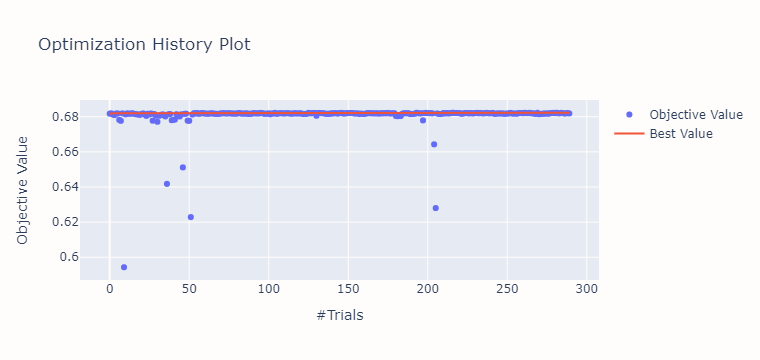

In [48]:
# history
optuna.visualization.plot_optimization_history(study)

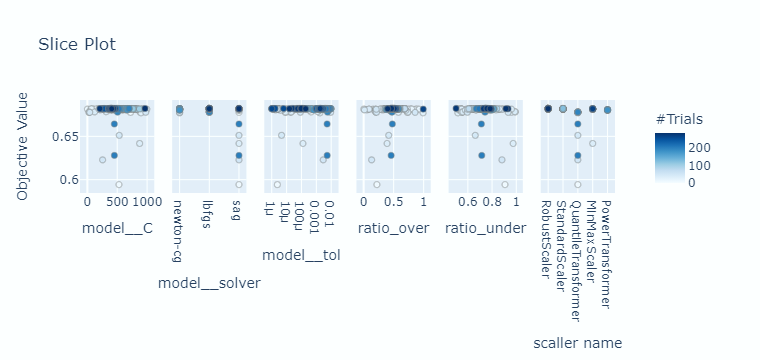

In [49]:
# Visualize individual hyperparameters as slice plot.
optuna.visualization.plot_slice(study)

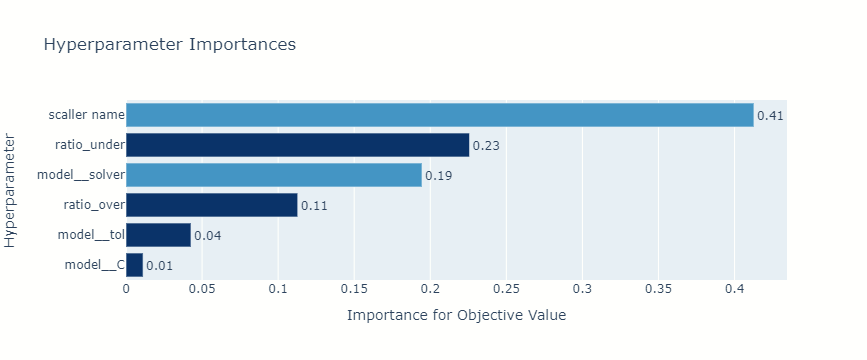

In [50]:
# Visualize parameter importances. 
optuna.visualization.plot_param_importances(study)

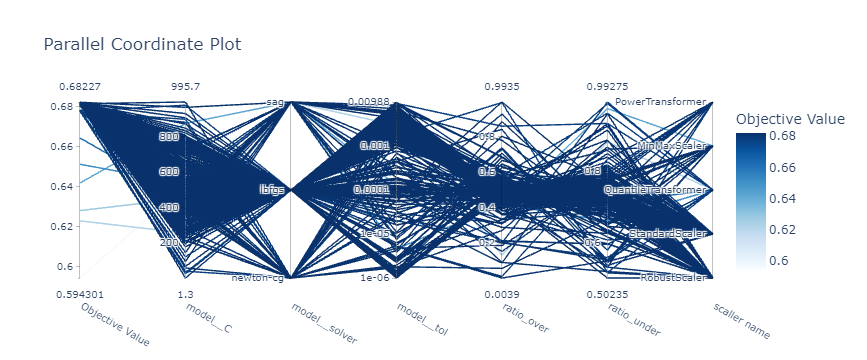

In [51]:
# Space search visualisation
optuna.visualization.plot_parallel_coordinate(study)

In [52]:
# Delete the temporary cache before exiting
# memory.clear(warn=False)
# rmtree(location)

## Meilleure solution

In [53]:
# Load best params from last search from file
# study=joblib.load(file_name)
best = study.best_params

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.6822700282610178
  Params: 
    ratio_over: 0.46115796940014214
    ratio_under: 0.5023533111086315
    scaller name: RobustScaler
    model__C: 387.7896540335958
    model__tol: 2.4770441141413036e-05
    model__solver: lbfgs


Class balance on fitting model step : Counter({0: 91840, 1: 13091})
TRAIN
               precision    recall  f1-score   support

           0       0.96      0.69      0.80    122457
           1       0.16      0.68      0.25     10473

    accuracy                           0.69    132930
   macro avg       0.56      0.68      0.53    132930
weighted avg       0.90      0.69      0.76    132930

 Scores  on train : {'COST': 0.6821814657387434, 'AUC': 0.7432573257141513}
TEST
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     30615
           1       0.15      0.66      0.25      2618

    accuracy                           0.69     33233
   macro avg       0.56      0.68      0.53     33233
weighted avg       0.90      0.69      0.76     33233

 Scores  on test : {'COST': 0.6767673939648462}


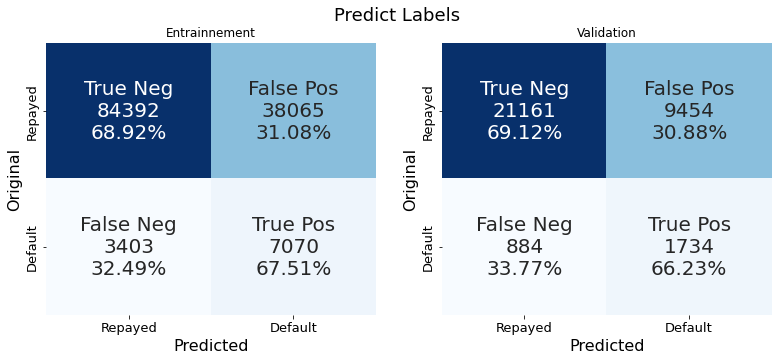

In [54]:
# print best results
# print('Best custom_score = {} for {}'.format(study.best_value,best))

# Initialize params
params = {}


# Variance space
# params['variance__threshold'] = best['variance']

# ratios for samplers
o_r = best['ratio_over']
u_r = best['ratio_under']

#over sampling
params['over__sampling_strategy'] =  ratio_initial *(1 + o_r)

# under sampling
params['under__sampling_strategy'] = ratio_initial *(1 + o_r)/( u_r)
    
# sample weight
# x = best['weight']  # MODIFIE
# params['model__class_weight'] = {0 : 1-x, 1 : x}
params['model__class_weight'] = 'balanced'

# Scaller space
scaler_name = best['scaller name']

if scaler_name == 'MinMaxScaler':
    params['scaler'] = mmx
elif scaler_name == 'StandardScaler':
    params['scaler'] =  std   
elif scaler_name == 'QuantileTransformer':
    params['scaler'] =  qt
elif scaler_name == 'RobustScaler':
    params['scaler'] =  rob
elif scaler_name == 'PowerTransformer':
    params['scaler'] =  pwt   
    
# Linear regression space       
params['model__C'] = best['model__C']
params['model__tol'] = best['model__tol']
params['model__solver'] = best['model__solver']
# if params['model__solver'] in ['newton-cg','sag','lbfgs']:
#     params['model__penalty'] = 'l2'
# params['model__max_iter'] = 10000 


# set and fit with best params
pipe_optim.set_params(**params)
pipe_optim.fit(train, train_true)

# Count effective classes
print('Class balance on fitting model step : %s' % Counter(pipe_samplers[0:2].fit_resample(train,train_true)[1]))
if LOG:
    run['Modele/[Optimisation]/Classe efectives'].log(str(Counter(pipe_samplers[0:2].fit_resample(train,train_true)[1])))


# print evaluation summary
evaluate_estimator(pipe_optim,
                   train,
                   train_true,
                   test,
                   test_true,
                   SCORER,
                   cost,
                   cv,
                   log=(LOG,run,'Modele/[Optimisation]/'))

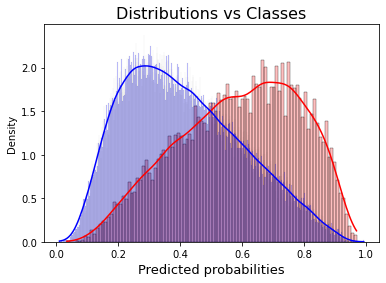

In [55]:
# Distribution of prediction probabilities versus classes
train_predicted_probas = pipe_optim.predict_proba(train)
proba_distributions(train_true,train_predicted_probas,(LOG,run,'Modele/[Optimisation]/Train'))

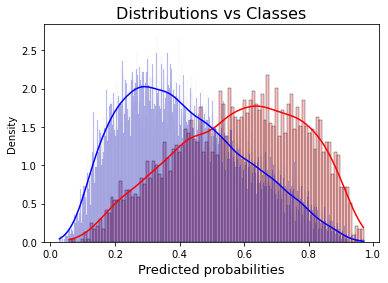

In [56]:
# Distribution of prediction probabilities versus classes
test_predicted_probas = pipe_optim.predict_proba(test)
proba_distributions(test_true,test_predicted_probas,(LOG,run,'Modele/[Optimisation]/Test'))

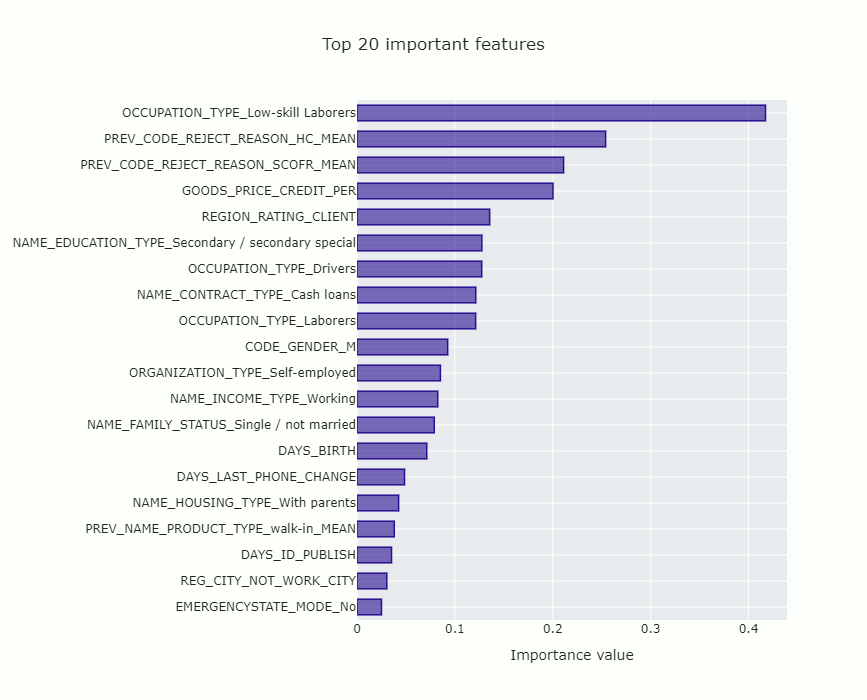

In [57]:
# Feature importance
feature_importance_plot(pipe_optim[-1].coef_[0],train,(LOG,run,'Modele/[Optimisation]/'))

# Récapitulatif des scores

In [58]:
import ast
# List of all experiment logged to Neptune ai
steps =['[Out of bag]','[Under]','[Over]','[Balance]','[Samplers & Weight]','[Optimisation]']
# create lists to retain fetched logs
train_costs, train_aucs, test_costs, names = list(), list(), list(), list()
# ierate throught logs
for step in steps:
    names.append('Logistic Regression '+step)
    train_scores = ast.literal_eval(run['Modele/'+step+'/Train scores'].fetch_last())
    test_score = ast.literal_eval(run['Modele/'+step+'/Test scores'].fetch_last())
    train_costs.append(train_scores['COST'])
    train_aucs.append(train_scores['AUC'])
    test_costs.append(test_score['COST'])

# create results Data Frame
results = pd.DataFrame({'Model name'   : names,
                        'Cost on train': train_costs,
                        'Auc on train' : train_aucs,
                        'Cost on test' : test_costs,
                       }
                      )
joblib.dump(results, 'Results/lr.results')
results.style.highlight_max()

,Model name,Cost on train,Auc on train,Cost on test
0,Logistic Regression [Out of bag],0.504292,0.742953,0.504224
1,Logistic Regression [Under],0.680406,0.742982,0.676955
2,Logistic Regression [Over],0.680766,0.743269,0.677388
3,Logistic Regression [Balance],0.681692,0.743229,0.676079
4,Logistic Regression [Samplers & Weight],0.681898,0.743272,0.676020
5,Logistic Regression [Optimisation],0.682181,0.743257,0.676767


In [59]:
html = results.style.highlight_max().render()

# Sauvegarde du modèle pour dasboard

modèle fitté sur toutes les données disponibles

In [60]:
# Set the filename
save_path = 'Models/'
name= 'logistic_regression_optimized_fitted'
file_name = name+'.mod'

# Fit on whole datas
pipe = clone(pipe_optim)
pipe.fit(features.drop('TARGET', axis=1), features.TARGET)

# Write on disk
joblib.dump(pipe, save_path+file_name, compress=('lzma',3))

if LOG:
    run['Best fitted model on all features jobilb'].upload(File(save_path+file_name))

In [61]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 2 operations to synchronize with Neptune. Do not kill this process.


All 2 operations synced, thanks for waiting!
